# GPT-2 Model

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Check we have a GPU and check the memory size of the GPU
!nvidia-smi

Fri Jul 29 13:28:10 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import pandas as pd

## Training

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 14.4 MB/s 
     |████████████████████████████████| 101 kB 6.2 MB/s 
     |████████████████████████████████| 596 kB 50.7 MB/s 
     |████████████████████████████████| 6.6 MB 39.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import pandas as pd

In [ ]:
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2', 
                                          bos_token='<|sos|>', 
                                          eos_token='<|eos|>', 
                                          pad_token='<|pad|>')


tokenizer.encode("Sample Text")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


[36674, 8255]

In [ ]:
human_adj = ['useful','nervous','fatigued','humble','vivacious','grave','favourable','inquisitive','polite','tired','creative','spirited','impressive','turgid','obliging','annoying','reliant','shrewed','dutiful','careless','sluggish','incapable','slipshod','sensible','haughty','outgoing','inattentive','flashy','quick','rash','natural','further','venturous','melancholic','lively','organized','unpopular','weaker','unimaginative','disappointing','dexterous','plucky','volcanic','respectful','late','mirthful','serene','discreet','hysterical','proud','provoking','quarrelsome','modest','fussy','delightful','mercurial','difficult','versatile','responsible','degenerated','playful','optimistic','dependable','indefatigable','balanced','civil','languid','zealous','raw','conscious','consistent','irascible','assiduous','great','pedantic','pensive','amiable','humorous','meticulous','critical','average','idle','generous','unmotivated','nil','aspiring','active','friendly','patient','leisurely','dull','absentminded','knowledgeable','determined','animated','trustworthy','pleasant','better','mild','headstrong','earnest','analytical','hypercritical','confident','useless','moody','natured','eager','tactless','unpleasant','imperturbable','dry','proficient','smart','preferable','fellow','comprehensive','inactive','inconsiderate','genuine','keen','diligent','phlegmatic','sympathetic','systematic','discontented','skilful','behaved','quiet','sentimental','sagacious','cultured','positive','prudent','composed','punctual','regular','special','scientific','emotional','tidy','obnoxious','conscientious','methodical','cheerful','reasonable','caustic','serious','inexperienced','ostentatious','unreserved','mature','kind','pleasing','refined','persistent','eccentric','affectionate','condescending','thorough','coherent','hearty','more','sociable','unwilling','minded','hopeless','egotistic','hearted','unsteady','industrious','evasive','snobbish','laborious','circumspect','talented','thoughtful','euphemistic','sensitive','outspoken','able','matured','experienced','benevolent','efficient','tactful','frequent','fiery','honest','irritable','academic','sophisticated','stupid','bright','neat','heady','indiscreet','steady','frank','shabby','best','impatient','continuous','amenable','jovial','weak','musical','extra','excellent','warm','irresponsible','confidential','gentle','stable','disagreeable','sarcastic','rational','acute','problematic','inconsistent','normal','impressionable','sharp','unstable','incooperative','harsh','high','enthusiastic','staid','glommy','restless','punctilious','fearless','helpful','uncommunicative','ambitious','mathematical','supportive','secluded','irritating','vague','inspiring','practical','new','dowdy','clever','irregular','reluctant','reserved','shy','slow','executive','direct','unreliable','demure','resourceful','orderly','charming','deferential','half','troublesome','hard','attentive','faithful','gracious','affected','vivid','dependent','boisterous','other','artificial','apathetic','complaisant','timid','general','devoted','blunt','childish','amicable','capable','brilliant','poor','popular','ingenious','disruptive','artistic','realistic','full','cautious','irreverent','competent','excitable','narrow','inclined','interested','cordial','courageous','open','superficial','sedate','uninteresting','careful','energetic','imaginative','unanticipated','coarse','quite','logical','sanguine','stern','candid','indecorous','intelligent','absent','outstanding','passive','undependable','ardent','touchy','witty','hasty','selfish','untidy','motivated','subtle','contemptuous','last','servile','assertive','intriguing','conciliatory','conceited','interesting','indolent','entertaining','glib','ferocious','hot','implacable','calm','impetuous','stoical','inventive','indifferent','eloquent','lovely','courteous','unfavourable','willing','tedious','spiteful','alert','shrewd','plain','amusing','talkative','enterprising','incisive','operative','ready','sincere','cheerless','cynical','repulsive','thoughtless','querulous','much','businesslike','independent','headed','good','dissatisfied','willed','harmonious','social','impulsive','reliable','pompous','painstaking','unaffected','unenterprising','provocative','pretentious','precocious','congenital','content','intolerant','strong','passionate','squeamish','drowsy','confused','domineering','presumptuous','lazy','fastidious','convivial','satisfactory']

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/gpt2/dataset/clean_key_field_cover_letters.csv")
test_df = pd.read_csv("/content/gdrive/MyDrive/gpt2/dataset/clean_test_key_field_cover_letters.csv")

In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)
df = df.reset_index()

In [ ]:
# counter = [0]*len(test_df)
# for idx, field in enumerate(test_df['fields']):
#   for df_field in test_df['fields'][idx:]:
#     if field in df_field :
#       counter[idx] += 1
      
#       print(field, df_field )
    

In [ ]:
train_df = df[:int(len(df)*0.90)].reset_index() # 95% is training data rest validation data
validation_df = df[int(len(df)*0.90):].reset_index()


In [ ]:
train_df

,level_0,index,Unnamed: 0,fields,keywords,company,text
0,0,1113,1113,EMT Cover Letter,"frequent, traumatic, supportive, private, stre...","Fillmore Emergency Services, EMT, CPR, EMT",As a skilled EMT with more than eight years of...
1,1,593,593,Event Planner Cover Letter,"multimillion, logistical, broad, functional, c...",NaN,Upon consideration of your posting for an Even...
2,2,598,598,Fashion Assistant Cover Letter,"fictional, socioeconomic, ongoing, numerous, d...",NaN,When I saw your posting for a new Fashion Assi...
3,3,743,743,Certified Medical Assistant Cover Letter,"confidential, smooth, initial, compassionate, ...","Certified Medical, Pathway Medical Center, NP",As a skilled medical professional with experie...
4,4,1009,1009,Maintenance Planner Cover Letter,"mandatory, preventive, weekly, bottom, annual","Bobart Parts Company, Bobart Parts Company",As an accomplished and highly skilled professi...
...,...,...,...,...,...,...,...
1687,1687,681,681,Yoga Instructor Cover Letter,"Prenatal, encouraging, welcoming, loyal, private","Lotus Yoga, Intuitive Flow, RYT, Intuitive Flo...",When I learned of your need for a new Yoga Ins...
1688,1688,577,577,Senior Engineer Cover Letter,"budgetary, non, productive, large, detailed",NaN,Upon learning of your need for a new Senior En...
1689,1689,1109,1109,Clinical Research Associate Cover Letter,"ineffective, adverse, vast, minimal, versed","the Clinical Research Associate, Endometrin Ph...","With this letter and the attached resume, I wo..."
1690,1690,1266,1266,Real Estate Broker Cover Letter,"approval, viable, steady, pre, leading",Homestead Real Estate,Upon learning of your search for a seasoned re...


In [ ]:
max_text = max([len(tokenizer.encode(str(text))) for text in df['text']])
print(max_text)
max_text += max([len(tokenizer.encode(str(field))) for field in df['fields']])
max_text += max([len(tokenizer.encode(str(field))) for field in df['keywords']])


667


In [ ]:
max_text

697

In [ ]:
import torch
from torch.utils.data import Dataset

class ApplicationDataset(Dataset):
    def __init__(self,df,tokenizer,gpt2_type="gpt2",max_length=max_text):
        self.tokenizer = tokenizer
        self.input_ids = []
        self.attention_masks = []
        
        for idx in range(len(df)):
            


            encoding_dict = tokenizer(f"<|sos|> {df.loc[idx, 'fields']} keywords: {', '.join((df.loc[idx, 'keywords']).split(',')[:3])}\n{df.loc[idx, 'text']}<|eos|>",truncation=True,
                                     max_length=max_length,
                                     padding='max_length')
            
            self.input_ids.append(torch.tensor(encoding_dict['input_ids']))
            self.attention_masks.append(torch.tensor(encoding_dict['attention_mask']))
        
    def __len__(self):
        return len(self.input_ids)
    
    def __getitem__(self,idx):
        return self.input_ids[idx], self.attention_masks[idx]

In [ ]:
from torch.utils.data import random_split
train_data = ApplicationDataset(train_df,tokenizer,max_length=max_text)
validation_data = ApplicationDataset(validation_df,tokenizer,max_length=max_text)

In [ ]:
tokenizer.decode(train_data[2][0])

'<|sos|>  Director Of Operations Cover Letter  keywords: progressive,  visionary,  bottom\nWith this letter and the attached resume, I would like to express my sincere interest in the Director of Operations position you have available. As a highly skilled and successful operations director with key experience driving successful business strategies and initiatives, I possess a wide range of knowledge and experience that will allow me to contribute toward the success of your company.\nMy expertise lies in successfully developing and implementing strategic business plans, significantly expanding business opportunities, and managing all bottom-line factors to maximize efficiency and realize substantial revenue growth. Through my experience, I have become adept in overseeing a full range of operational responsibilities—including P&L administration, budget forecasting, quality management, and deal negotiation’to ensure outstanding corporate performance. My additional success in managing and 

In [ ]:
# train_size = int(0.9 * len(dataset)) #90% train, 10% validation
# val_size = len(dataset)-train_size

# train,val = random_split(dataset,[train_size,val_size])
# print(f'No of train samples = {train_size} and Number of validation samples = {val_size}')

In [ ]:
print(tokenizer.decode([50259, 50259, 50259, 50259, 50259, 50259, 50259]))

<|pad|> <|pad|> <|pad|> <|pad|> <|pad|> <|pad|> <|pad|>


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 4

train_dataloader = DataLoader(train_data,sampler = RandomSampler(train_data),
                             batch_size = batch_size)

val_dataloader = DataLoader(validation_data,sampler = SequentialSampler(validation_data),
                           batch_size = batch_size)

In [ ]:
print([tokenizer.decode(token) for token in train_data[6]])

['<|sos|>  File Clerk Cover Letter  keywords: swift,  incoming,  organized\nUpon learning of your need for a detail-oriented File Clerk, I hastened to submit my resume for your review. As an organized and motivated professional with experience providing records maintenance and general \n, I am confident I would be a valuable asset to your team.\nFrom coding and storing files and managing databases to organizing incoming documents and updating existing records as necessary, my background has prepared me to excel in this role. Backed by superior communication and multitasking capabilities, I excel at driving office productivity and efficiency while ensuring swift and accurate access to files when needed.\nHighlights of my experience include…\n Performing records maintenance functions—including archiving, categorizing, sorting, copying, printing, coding, and storing—while ensuring top-notch accuracy and organization.\n Balancing multiple filing tasks within high-volume environments while 

In [ ]:
import random
from transformers import GPT2LMHeadModel, GPT2Config
import numpy as np

In [ ]:
configuration = GPT2Config.from_pretrained('gpt2', output_hidden_states=False)
print(configuration)
model = GPT2LMHeadModel.from_pretrained('gpt2', config=configuration,ignore_mismatched_sizes=True)
model.resize_token_embeddings(len(tokenizer))

device = torch.device("cuda")
model.cuda()

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

GPT2Config {
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
  },
  "transformers_version": "4.21.0",
  "use_cache": true,
  "vocab_size": 50257
}



In [ ]:
#previously epochs = 3, lr=5e-4
epochs = 6
warmup_steps = 1e2
sample_every = 100

from transformers import AdamW

optimizer = AdamW(model.parameters(),
                  lr = 3e-4,
                  eps = 1e-8
                )

from transformers import get_linear_schedule_with_warmup

total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = warmup_steps, 
                                            num_training_steps = total_steps)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
import random
import time
import datetime

def format_time(elapsed):
    return str(datetime.timedelta(seconds=int(round((elapsed)))))

total_t0 = time.time()

training_stats = []

model = model.to(device)

for epoch_i in range(0, epochs):

    print(f'Beginning epoch {epoch_i + 1} of {epochs}')

    t0 = time.time()

    total_train_loss = 0

    model.train()

    for step, batch in enumerate(train_dataloader):

        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)

        model.zero_grad()        

        outputs = model(  b_input_ids,
                          labels=b_labels, 
                          attention_mask = b_masks,
                          token_type_ids=None
                        )

        loss = outputs[0]  

        batch_loss = loss.item()
        total_train_loss += batch_loss

        # Get sample every 100 batches.
        if step % sample_every == 0 and not step == 0:

            elapsed = format_time(time.time() - t0)
            print(f'Batch {step} of {len(train_dataloader)}. Loss:{batch_loss}. Time:{elapsed}')

            model.eval()

            sample_outputs = model.generate(
                                    bos_token_id=random.randint(1,30000),
                                    do_sample=True,   
                                    top_k=50, 
                                    max_length = 200,
                                    top_p=0.95, 
                                    num_return_sequences=1
                                )
            for i, sample_output in enumerate(sample_outputs):
                  print(f'Example output: {tokenizer.decode(sample_output, skip_special_tokens=True)}')
            
            model.train()

        loss.backward()

        optimizer.step()

        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)       
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print(f'Average Training Loss: {avg_train_loss}. Epoch time: {training_time}')

    t0 = time.time()

    model.eval()

    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in val_dataloader:
        
        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)
        
        with torch.no_grad():        

            outputs  = model(b_input_ids,  
                             attention_mask = b_masks,
                             labels=b_labels)
          
            loss = outputs[0]  
            
        batch_loss = loss.item()
        total_eval_loss += batch_loss        

    avg_val_loss = total_eval_loss / len(val_dataloader)
    
    validation_time = format_time(time.time() - t0)    

    print(f'Validation loss: {avg_val_loss}. Validation Time: {validation_time}')

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print(f'Total training took {format_time(time.time()-total_t0)}')

Beginning epoch 1 of 6


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 423. Loss:1.7440948486328125. Time:0:00:52
Example output:  bipartisan with


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 423. Loss:1.2935559749603271. Time:0:01:44
Example output:  increasing the customer base.
’The following are some of the most important facts that you can learn from the above table of facts and figures:
’
’ Your name is available for this position in the following three levels of the Department of Supply Manager. In this level of Supply Manager, you have the following responsibilities:
’ Designing and implementing a new product and marketing strategy, while demonstrating strong customer loyalty and engagement.
’ Designing and maintaining new and improved products and marketing efforts.
’ Providing the most effective and efficient food storage for customers who need reliable and fresh produce.
’ Ensuring that customers are fully satisfied with the delivery of the new product.
’ Providing the highest level of quality food and beverage service, including fresh fresh produce, fresh water, and fresh soups.
’ Providing improved customer service,


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 423. Loss:1.362800121307373. Time:0:02:36
Example output: day




The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 423. Loss:1.065337896347046. Time:0:03:27
Example output:  Hang Office Manager Cover Letter  keywords: superior,  multimillion,  superior
Upon review of your posting for a new Office Manager to join your team at Silverstone Group, I felt compelled to submit my resume for your review. As a seasoned professional with extensive experience coordinating diverse and motivated operations operations and management responsibilities across numerous organizations, I am confident in my ability to greatly contribute to this position.
My background includes overseeing complex and complex office activities while meeting deadlines and communicating directly with management teams, contractors, and staff in a timely, expeditious, and productive manner. My ability to collaborate effectively and effectively will certainly benefit your company, as well as your business.
Highlights of my background include…
 Assisting in ensuring optimal office operations, such as budgeting, staff training, and

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 423. Loss:1.2436540126800537. Time:0:00:49
Example output:  foods

With the knowledge of biology and anatomy to teach new life skills, my skills in nutrition, homeopathy, and other health/vital biology are sure to be of value to you.
My background lies in developing and administering nutritional programs to improve health and optimize nutritional quality. My expertise lies in identifying areas of deficiency and optimizing interventions, administering nutritional solutions, and educating individuals on food preparation, nutrition, and dietary restrictions for optimal health.
The following achievements demonstrate my qualifications for this position:
 Adjunct Professor of Biology at Kentucky State College, assisting students with the preparation of healthy, wholesome, and nutritional information for daily living.
 Mentored and mentored individuals at high-risk ages with a wide range of nutritional requirements and dietary strategies to achieve an average of 45% and 45% of th

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 423. Loss:1.1114128828048706. Time:0:01:41
Example output:  trail Rental Broker Cover Letter  keywords: basic,  vacant,  short
When I learned of your need for a rental broker with the position of rental broker with your company, I hastened to submit the resume for your review. As an experienced and successful professional with a proven commitment to providing outstanding service while facilitating optimal client relationships and optimal client experiences, I am ready to significantly contribute to your bottom line as your next rental broker.
From negotiating rent increases, leasing/mortgaging, and leasing complex building projects, to performing full-time rental work for reputable brokers, my background has prepared me to excel in this role. With strong interpersonal, analytical, and interpersonal skills, coupled with my inherent keen interest in providing outstanding customer service, I am prepared to excel in this role at JBL Financial.
Highlights of my qualifications i

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 423. Loss:1.1480638980865479. Time:0:02:32
Example output: intend Project Director Cover Letter keywords: planned,  concrete,  concrete
When I learned of your need for an experienced Project Director, I quickly decided to submit my resume for your review. With more than 10 years of experience as a Project Director with Centurion Construction & Construction (CP&C) in Portland, Oregon, I am confident that I could quickly exceed your expectations for this role.
My experience includes directing projects for engineering project development and implementation to ensure project success and minimize costs. I have strong leadership and communication skills, and I possess comprehensive knowledge in planning projects for concrete, concrete, and concrete flooring projects, and providing concrete, concrete floor plans to customers in both public and private projects.
Highlights of my experience include:
 Coordinating all aspects of project management, including project funding, budgets

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 423. Loss:1.0751731395721436. Time:0:03:23
Example output:  surround Health Education teacher and administrator Cover Letter keywords:  interdisciplinary,  individualized,  personalized
Upon learning of your posting for an Assistant Teacher with a Concentration in Health Education in a state-mandated elementary-aged program, I hastened to submit my resume for your consideration. My passion for elementary education spans expertise as well as my commitment to providing first-rate personalized education for underserved populations.
My background spans experience supporting students in their school responsibilities, from teaching to preparing classroom materials. From preparing grades to facilitating exams and taking attendance and attendance report, my dedication to achieving outstanding results prepares me to thrive in this challenging educational field. Additionally, my exceptional communication, problem solving, and multitasking skills position me to thrive in this challen

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 423. Loss:1.2281094789505005. Time:0:00:49
Example output:  reflex (or anesthesiologist) is responsible for maintaining a level of accuracy in the medical literature that is generally in the medical literature.

As anesthesiologist, I have been involved with all facets of medical practice for several years. I have been involved in several successful clinical trials and tests for multiple clients—including my own patients’s. I also work with a team of eight doctors to implement treatment plans to prevent and/or treat any adverse events in this capacity. I also work in a specialized laboratory to monitor laboratory performance and determine how patients’ health conditions impact the accuracy of my examinations.
My experience lies in performing an extensive range of laboratory tests that are generally recognized as accuracy to patients’s. I have consistently led research projects that helped to drive improvement in patient conditions and progress throughout my career. Additio

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 423. Loss:1.0551482439041138. Time:0:01:41
Example output:  display Data Scientist Cover Letter  keywords: multistate,  unparalleled,  technical
As a skilled and motivated professional with expertise in data science, I am well positioned to make a significant contribution in the healthcare sector. As a highly accomplished and highly skilled data analysis specialist, I possess comprehensive experience in developing, maintaining, and updating databases, along with a strong academic degree in mathematics.
My qualifications include:
 Analyzing comprehensive data sets and analyses using various software programs and frameworks to gather, analyze, and share complex data and patterns while providing key analysis and management to optimize performance.
 Working closely with top-performing staff and developing custom data models to generate results that maximize efficiency and productivity while improving performance and organization.
 Expertise in database management, machine lear

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 423. Loss:1.1520986557006836. Time:0:02:32
Example output:  pastor Sales Associate Cover Letter  keywords: sales,  multi,  seamless
As an experienced and enthusiastic professional with 14+ years of experience supporting teams in driving the sales and merchandising aspects of sales, merchandising and team collaboration, I am confident that I could significantly benefit your team in this role.
My background lies in successfully supporting diverse groups in achieving sales goals, maximizing revenue growth, and establishing productive, productive teams. Through my successful relationship with high-performing teams, I am well positioned to make a significant impact on your team.
Highlights of my experience include…
 Earning a Bachelor’s degree in Business Development; completing coursework related to sales, merchandising, promotional and communications and merchandising, and product partnerships to drive sales and revenue enhancement for major chains like General Mills, McDonal

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 423. Loss:1.044256567955017. Time:0:03:23
Example output:  illicit Moneysitter Cover Letter  keywords: overdue,  overdue,  higher
Upon review of your posting for a Moneysitter, I felt compelled to submit my resume for your review. With five years of excellent experience in collecting and keeping an unwavering attention to details, I am prepared to significantly contribute to your team’s objectives in this position.
My background includes collecting overdue overdue balances, collecting overdue payments, and maintaining clean, orderly collection operations. With my strong knowledge of current and prospective job responsibilities and my ability to strategically communicate with a wide range of clients, I am confident that I can enhance your company’s success in this role.
Highlights of my background include:
 Excelling as a Salesforce.com Salesperson with an extensive background in credit cards, exchanges, tracking, and collection
 Excelling as a Certified Moneysitter and att

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 423. Loss:0.8058648109436035. Time:0:00:49
Example output:  Liberation City Engineer Cover Letter  keywords: energized,  electric,  industrial
When I learned of your posting for a City Engineer to join your team at Clearwater Community College, I hastened to submit my resume for your consideration. As an enthusiastic and educated professional with experience overseeing maintenance and operations for the City of Clearwater and providing comprehensive services to meet, or surpass, city goals, I am prepared to significantly contribute to your school’s objectives.
My background encompasses performing a range of responsibilities within urban engineering departments to ensure streamlined operations and realize top-notch performance levels. From achieving office efficiency and streamlining operations to achieving streamlined operational systems and leading energy efficiency and performance, I excel at managing a full range of responsibilities, from building systems and preparing 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 423. Loss:0.8377181887626648. Time:0:01:41
Example output:  Nam Tandem Driver Cover Letter  keywords: regional,  regional,  regional
Upon learning of your posting for a Tandem Driver, I hastened to submit my resume for your review. As an accomplished professional with experience driving and supporting regional passenger service and safety while providing thorough training programs and implementing safety initiatives, I am confident that I would significantly benefit your team.
From observing rider conduct to communicating with cross-functional departments and ensuring outstanding vehicle functioning, my background has prepared me to excel in this capacity. With my solid history of providing outstanding service within the hospitality industry, combined with my dedication to optimizing passenger experiences, I am ready to provide outstanding service to your team.
Highlights of my background include…
 Serving as a Team Owner with Westin’s BBQ & Grill, transporting up to 110 d

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 423. Loss:1.2381426095962524. Time:0:02:32
Example output: ION Manager Cover Letter  keywords: visionary,  visionary,  creative
I am writing to be considered for the position of Manager at Pylon Industries. My expertise lies in managing all facets of management for a diverse team while ensuring the highest level of customer satisfaction and loyalty. I have been in the sales and business leadership field for three years and am committed to ensuring the highest levels of customer service and satisfaction.
During the course of my time at Pylon Industries, I spearheaded the design and development of a creative and visionary marketing solution for the successful clientele of your company. From creating and implementing innovative marketing initiatives for the past decade and building a successful sales team to managing multimillion-dollar budgets, I was responsible for orchestrating the creation and implementation of a strategy and successfully managed a significant reduction i

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 423. Loss:1.007869005203247. Time:0:03:23
Example output:  glimpse Dental Assistant Cover Letter  keywords: oral,  receivable,  personalized
I am writing to apply for the Dental Assistant position at Centurion Medical. My experience has prepared me well for this position, and I feel that I can use the skills and education provided to help me make a substantial contribution to your team.
Currently, I work with a team of 6 dentists and three primary caregivers at my job. I have more than 11 years of experience with dental team, and I think I have the tools and knowledge that can help my team in this role. Thank you for considering my application.
Sincerely,
Average Training Loss: 0.9348419312889694. Epoch time: 0:03:36
Validation loss: 1.0238620520879824. Validation Time: 0:00:07
Beginning epoch 5 of 6


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 423. Loss:0.749052882194519. Time:0:00:49
Example output:  Laure Bilingual Worker Cover Letter  keywords: bilingual,  incoming,  empathic
When I learned of Sotus’s need for a bilingual bilingual worker, I hastened to submit my resume for your review. My experience in bilingual management, as well as my commitment to fostering collaborative and productive organizational environments, characterizes my career accomplishments and will allow me to greatly contribute to the success of the company’s objectives.
From preparing and delivering documentation and developing customized learning materials to supporting in-depth training programs and coaching employees, my background has prepared me to excel in this role. My strengths in communication and problem-solving position me to thrive in this new role.
Consider the following highlights of my qualifications:
 Providing comprehensive training and development support to staff, assigning tasks, coordinating employee meetings, and tra

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 423. Loss:0.9068988561630249. Time:0:01:41
Example output: ism Management Cover Letter keywords: entrepreneurial,  entrepreneurial,  entrepreneurial
Upon review of your posting for a Management Manager to join your team at Blue Star Technologies, I felt compelled to submit my resume for your consideration. With my academic-based degree in business administration, as well as my entrepreneurial skill set, I feel confident in my ability to significantly benefit your organization in this capacity.
From driving team member engagement and maintaining strong and thriving relationships to overseeing staff training programs and liaising between cross-functional departments, my background has consistently been characterized by my keen ability to strategically oversee all aspects of business operations to maximize productivity. Additionally, my excellent communication, time management, and interpersonal talents position me to thrive in this position.
Consider the following highlights

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 423. Loss:0.9124634861946106. Time:0:02:32
Example output: oun

Paloosa Junior
.
I have learned to use my computer best to identify the best way to do something that makes me happy, as well as my ability to take it all on when I'm not working. I believe my ability to make a difference in the lives of many people is what makes me the right person to work for you.
I believe I am the best candidate for the job at your company. I have worked in the field for more than six years, and I believe that I can help the company through its transition from the past to the new. I have done this in the past while my father worked for a company that I worked in for seven years. I am in the process of growing out of a job at a local business. The last two years I was a part of the team that hired a new


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 423. Loss:0.8383200764656067. Time:0:03:23
Example output:  election Office Manager Cover Letter  keywords: regional,  global,  executive
Upon learning of your search for a new Office Manager to join your team at Foundry Design, I quickly decided to submit my resume for your review. With my proven ability to strategically define business opportunities to optimize office operations and operations, combined with my communication and problem-solving capabilities, I feel confident that I would significantly benefit your team.
From consulting with peers and management teams to implementing innovative processes and leading office management projects, my background has prepared me to excel in this role. Backed by my steadfast motivation to generate peak results and generate superior office services, I excel at: Orchestrating all aspects of office management—including staff development, budget administration, staff training, staff leadership, and marketing efforts—while driving ac

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 100 of 423. Loss:0.79735267162323. Time:0:00:49
Example output:  crazy New Girl Cover Letter  keywords: desirable,  same,  appealing
Upon learning of your search for a new New Girl to join your team at Bayside Salon & Spa, I hastened to submit my resume for your consideration. As a highly organized and service-oriented professional with more than five years of experience developing client relationships, my background in providing outstanding customer service and exceptional attention to detail position me to significantly impact your establishment in this role.
From managing multi-line phone coverage to scheduling appointments and replenishing clients’lives, my background has prepared me to excel in this challenging and energizing position. My personable demeanor, positive attitude, and personable and team-oriented nature are just a few of the skills I offer. Additionally, my excellent communication and organization talents position me to thrive in this challenging and energizing

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 200 of 423. Loss:0.8350185751914978. Time:0:01:41
Example output:  bench AAS Degree Specialist Cover Letter  keywords: proficient,  incoming,  excellent
Upon learning of your need for a skilled and dedicated AAS Degree Specialist, I hastened to submit my resume for your review. My extensive education and hands-on practicum experience – as well as my dedication to providing comprehensive administrative assistance – make me an excellent fit for your organization.
My background in technical and administrative support—along with my commitment to achieving an accomplished AAS degree in 2015 – prepares me to excel in this role. With a comprehensive breadth of education and hands-on practicum experience, along with a solid foundation in Microsoft Office Suite and a keen ability to integrate various systems, I am prepared to excel in providing outstanding administrative support and training for your team.
Highlights of my background include the following:
 Excelling in a hands-on profess

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 300 of 423. Loss:0.7223692536354065. Time:0:02:32
Example output:  incorporated Communications Specialist Cover Letter  keywords: digital,  global,  global
Upon review of your posting for a Communications Specialist, I am submitting my resume for your review. As an accomplished and results-oriented professional with comprehensive experience managing high-performing communications, communications, and marketing services, I feel confident that I would significantly contribute to the success of your company.
My background spans successful experience managing full-scale communications and technology needs from start to finish for major global companies. From overseeing a large media campaign and developing strategic strategic communications plans to liaising with global clients and spearheading strategic initiatives and alliances, I excel at implementing strategic communications plans and initiatives to drive revenue growth. With expertise in a wide range of industries and platforms,

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Batch 400 of 423. Loss:0.8476575613021851. Time:0:03:23
Example output: Peter Web Director Cover Letter  keywords: editorial,  tireless,  tireless
When I learned of your need for a dedicated and reliable Web director, I hastened to submit my resume for your review. As an accomplished and results-driven writer with more than 11 years of experience developing and managing web content for various print media—complemented by my keen ability to collaborate effectively with peers and editors—I am confident that I could exceed your expectations for this role.
From developing innovative content ideas and posting compelling copy to producing web-based content strategies and collaborating effectively with cross-functional departments, my background has prepared me to excel in this position. My ability to implement forward-thinking ideas and programs while stimulating effective communication, presentation, and user experience, along with my dynamic presentation talents, position me ready to thriv

In [ ]:
!mkdir /content/gdrive/MyDrive/gpt2/modelKey_lr34_b4_e6

mkdir: cannot create directory ‘/content/gdrive/MyDrive/gpt2/modelKey_lr34_b4_e6’: File exists


In [ ]:
print('saving model...')
model.save_pretrained("/content/gdrive/MyDrive/gpt2/modelKey_lr34_b4_e6")

saving model...


In [ ]:
train_val = []
for train_stat in training_stats:
  stats = []
  for i in train_stat.values():
    if type(i) != int and type(i) != str:
      
      stats.append(float(i))
  print(stats)
  train_val.append(stats)


[2.624239239286869, 1.175415463745594]
[1.1197652071362127, 1.087781344850858]
[1.0089935599771234, 1.0474592329313357]
[0.9348419312889694, 1.0238620520879824]
[0.8806703707850572, 1.0152933293332655]
[0.8407839986872165, 1.015409334252278]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision', 2)
df_stats = pd.DataFrame(data=training_stats)
df_stats = df_stats.set_index('epoch')

sns.set(style='darkgrid')

sns.set(font_scale=2.2)
plt.rcParams["figure.figsize"] = (20,10)

plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
xt = [i for i in range(1,epochs+1)]
plt.xticks(xt)

plt.show()

NameError: ignored

## Test model

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import random
try:
  from transformers import GPT2LMHeadModel, GPT2Config
except:
  !pip install transformers
  from transformers import GPT2LMHeadModel, GPT2Config
import numpy as np
import torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 34.0 MB/s 
     |████████████████████████████████| 101 kB 14.9 MB/s 
     |████████████████████████████████| 596 kB 69.6 MB/s 
     |████████████████████████████████| 6.6 MB 55.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
configuration = GPT2Config("/content/gdrive/MyDrive/gpt2/modelKey_lr44_b4_e7/", output_hidden_states=False)

In [ ]:
#configuration


In [ ]:
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2', 
                                          bos_token='<|sos|>', 
                                          eos_token='<|eos|>', 
                                          pad_token='<|pad|>')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
#model = GPT2LMHeadModel(configuration)
model = GPT2LMHeadModel.from_pretrained("/content/gdrive/MyDrive/gpt2/modelKey_lr34_b4_e5")#, config=configuration)

model.resize_token_embeddings(len(tokenizer))

device = torch.device("cuda")
model.cuda()

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
configuration

GPT2Config {
  "activation_function": "gelu_new",
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "transformers_version": "4.21.1",
  "use_cache": true,
  "vocab_size": "/content/gdrive/MyDrive/gpt2/modelKey_lr44_b4_e7/"
}

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The GPT-2 model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:2]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Transformer Layer ====\n')

for p in params[2:-2]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-2:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

In [ ]:
max_text = 677

In [ ]:
""" I am excited to be applying for the Social Assistant position at Cloud Clearwater. As a highly competent Social Administrative Assistant, I am confident that I would be a valuable asset to your organization. With a strong background in Administrative and Administrative support, I am well versed in using administrative software to organize and organize my work space. Furthermore, I have always enjoyed working with my coworkers and being able to help others improve their productivity and efficiency.
I have earned a reputation for my ability to be extremely flexible and comfortable with deadlines. I am an extremely critical thinker, able to quickly determine what needs to be done and make sure everyone’s attention is on the task at hand. I have also gained a reputation for being a reliable and professional resource. During my previous role at River Tech, I coordinated all communications with administrative support staff and coordinated the social group meetings. During my time at River Tech, I frequently faced problems and administrative requests that resulted in an increase in productivity. During my previous role, I frequently faced questions from management that resulted in an increase in employee retention. I believe that I can bring much value to Cloud Clearwater and would welcome the opportunity to discuss the Social Assistant position with you in a more personal setting.
Sincerely,"""

"""I am writing to express my interest in the Social Assistant position at your facility. I have spent the past 15 years working in this field and am skilled, experienced, and highly organized. I believe I am the ideal candidate for this job.
I have extensive experience in various administrative and operational tasks. I have successfully handled multi-line phone systems and handled sensitive data. I am highly organized and work well in a team environment.
Some of my professional achievements include:
 Designed and implemented a system that dynamically allocated and maintained servers for a company’s medical office.
 Streamlined the processing of insurance claims and created a new insurance claim filing system.
 Coordinated with HR staff to create and implement a new employee orientation program.
I believe I am a hard worker and would welcome the opportunity to contribute to your organization. Please feel free to reach out to me at your earliest convenience. I look forward to hearing from you soon.
Sincerely, """

'I am writing to express my interest in the Social Assistant position at your facility. I have spent the past 15 years working in this field and am skilled, experienced, and highly organized. I believe I am the ideal candidate for this job.\nI have extensive experience in various administrative and operational tasks. I have successfully handled multi-line phone systems and handled sensitive data. I am highly organized and work well in a team environment.\nSome of my professional achievements include:\n Designed and implemented a system that dynamically allocated and maintained servers for a company’s medical office.\n Streamlined the processing of insurance claims and created a new insurance claim filing system.\n Coordinated with HR staff to create and implement a new employee orientation program.\nI believe I am a hard worker and would welcome the opportunity to contribute to your organization. Please feel free to reach out to me at your earliest convenience. I look forward to hearin

In [ ]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 153 µs (started: 2022-08-08 11:44:34 +00:00)


In [ ]:
model.eval()

prompt = "<|sos|> Forester Cover Letter, keywords:  planting new trees, monitoring, conserving wildlife habitats\n" #confident, social, reliable

generated = torch.tensor(tokenizer.encode(prompt)).unsqueeze(0)
generated = generated.to(device)

sample_outputs = model.generate(
                                generated, 
                                do_sample=True,   
                                top_k=50, 
                                max_length = max_text,
                                temperature=0.7,
                                top_p=0.95, 
                                num_return_sequences=10
                                )

for i, sample_output in enumerate(sample_outputs):
    example = tokenizer.decode(sample_output, skip_special_tokens=True)
    print("{}:{}\n".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))
    

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0: Forester Cover Letter, keywords:  planting new trees, monitoring, conserving wildlife habitats
I am writing in regard to your posting for a Forester to join your team at the Apex Tree Conservancy. I am passionate about preserving the beauty and diversity of the natural beauty of the natural world through my meticulous planning and planting. In my current position as a Forester with the Apex Tree House, I take ownership of the responsibility for managing the growing seasons, managing the natural fall/winter seasons, and monitoring the health of the surrounding area. I am an active researcher, researcher, and communicator with strong interpersonal skills and a keen eye for the natural world. I am a natural resource and supporter of the natural sales of local and state-regulated wildlife.
My extensive experience as a Forester with the Apex Tree House has equipped me with the skills and abilities necessary to thrive as a member of your team. I am passionate about preserving the beauty, 

In [ ]:
model.eval()

prompt = "<|sos|> Manufacturer Cover Letter keywords: social, hardworking, reliable\n"

generated = torch.tensor(tokenizer.encode(prompt)).unsqueeze(0)
generated = generated.to(device)

sample_outputs = model.generate(
                                generated, 
                                do_sample=True,   
                                top_k=50, 
                                max_length = max_text,
                                temperature=0.7,
                                top_p=0.95, 
                                num_return_sequences=10
                                )

for i, sample_output in enumerate(sample_outputs):
    print("{}:{}\n".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))
    

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0: Manufacturer Cover Letter keywords: social, hardworking, reliable
I am submitting my resume for the position of Model. I possess the skills required to be a successful Model and would be a great asset to your company.
My professional experience includes a range of technical skills that are sure to make me an asset to your team. I have a solid foundation in basic modeling, as well as a Bachelor’s degree in Modeling from the University of Michigan.
My work experience includes using CAD software to create detailed models of clothing, jewelry, and accessories. I have worked with various types of computer and mobile devices, such as smartphones, tablets, and smartwatches. I have a strong sense of responsibility and can be relied upon to do my best to make an immediate and positive impact on your company.
I have a bachelor’s degree in Modeling and a Bachelor’s degree in Social Work from Michigan. I have spent the past 10 years working on a variety of projects for various clients, includin

## Quantitative Evaluation of the Model

In [ ]:
!pip install --quiet datasets
!pip install --quiet bert_score
!pip install --quiet rouge_score
!pip install --quiet bleu
!pip install --quiet glue

     |████████████████████████████████| 365 kB 3.1 MB/s 
     |████████████████████████████████| 212 kB 16.3 MB/s 
     |████████████████████████████████| 115 kB 28.1 MB/s 
     |████████████████████████████████| 141 kB 17.8 MB/s 
     |████████████████████████████████| 127 kB 18.2 MB/s 
     |████████████████████████████████| 60 kB 4.5 MB/s 
     |████████████████████████████████| 295 kB 8.0 MB/s 
     |████████████████████████████████| 340 kB 55.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 2.9.6 which is incompatible.


In [ ]:
pip install git+https://github.com/google-research/bleurt.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/google-research/bleurt.git to /tmp/pip-req-build-oelma904
  Running command git clone -q https://github.com/google-research/bleurt.git /tmp/pip-req-build-oelma904
     |████████████████████████████████| 352 kB 7.1 MB/s 
     |████████████████████████████████| 1.2 MB 66.4 MB/s 
  Created wheel for BLEURT: filename=BLEURT-0.0.2-py3-none-any.whl size=16456761 sha256=f13585d418262f30a403c2496297bf183f7741a90fcd448e6fa181e4811da907
  Stored in directory: /tmp/pip-ephem-wheel-cache-y63zix6y/wheels/e2/2d/ea/b7a8b2424d2908d2a79d73ce8217d5ac4bd97ed3f47160a7f5
Successfully built BLEURT


In [ ]:
!pip install SoMaJo==2.2.0
from somajo import SoMaJo
def detokenize(tokens):
    out = []
    for token in tokens:
        if token.original_spelling is not None:
            out.append(token.original_spelling)
        else:
            out.append(token.text)
        if token.space_after:
            out.append(" ")
    return "".join(out)

def splitTextIntoSentences(text):
    tokenizer = SoMaJo("de_CMC")
    sentences = tokenizer.tokenize_text([text])
    sentence_decoded = []
    for sentence in tqdm(sentences):
        sentence_decoded.append(detokenize(sentence))
    return sentence_decoded #[:number_sentences]
    #return nltk.sent_tokenize(text, language=language)[:number_sentences]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 5.2 MB/s 


In [ ]:
from datasets import list_metrics
metrics_list = list_metrics()
print(metrics_list)

['accuracy', 'bertscore', 'bleu', 'bleurt', 'cer', 'chrf', 'code_eval', 'comet', 'competition_math', 'coval', 'cuad', 'exact_match', 'f1', 'frugalscore', 'glue', 'google_bleu', 'indic_glue', 'mae', 'mahalanobis', 'matthews_correlation', 'mauve', 'mean_iou', 'meteor', 'mse', 'pearsonr', 'perplexity', 'poseval', 'precision', 'recall', 'rl_reliability', 'roc_auc', 'rouge', 'sacrebleu', 'sari', 'seqeval', 'spearmanr', 'squad', 'squad_v2', 'super_glue', 'ter', 'trec_eval', 'wer', 'wiki_split', 'xnli', 'xtreme_s', 'Vlasta/pr_auc', 'abdusahmbzuai/aradiawer', 'angelina-wang/directional_bias_amplification', 'codeparrot/apps_metric', 'cpllab/syntaxgym', 'daiyizheng/valid', 'erntkn/dice_coefficient', 'gorkaartola/my_metric', 'hack/test_metric', 'jordyvl/ece', 'kaggle/ai4code', 'kaggle/amex', 'loubnabnl/apps_metric2', 'lvwerra/bary_score', 'lvwerra/test', 'mathemakitten/harness_sentiment', 'mathemakitten/sentiment', 'mfumanelli/geometric_mean', 'mgfrantz/roc_auc_macro', 'yzha/ctc_eval']


In [ ]:
from datasets import load_metric
bert_metric = load_metric('bertscore')
rouge_metric = load_metric('rouge')
bleu_metric = load_metric('bleu')
bleurt_metric = load_metric('bleurt')


In [ ]:
from transformers import pipeline
cola_classifier = pipeline(model="textattack/bert-base-uncased-CoLA")

Downloading:   0%|          | 0.00/0.98k [00:00<?, ?B/s]

In [ ]:
import pandas as pd

test_data = pd.read_csv("/content/gdrive/MyDrive/gpt2/dataset/clean_test_key_field_cover_letters.csv")
test_data

,Unnamed: 0,fields,keywords,text
0,0,Account Executive Cover Letter,"formidable, polished, hard, knowledgeable, fri...",It is a pleasure to be applying for the Accoun...
1,1,Account Manager Cover Letter,"pitch, vertical, pharmaceutical, prestigious, ...",I'm excited to be applying for the Account Man...
2,2,Accounts Payable Cover Letter,"very, pristine, valid, meticulous, organized",I would like to introduce myself as a candidat...
3,3,Adjunct Faculty Cover Letter,"sterling, diligent, mathematical, inspiring, c...",I'm honored to apply to the Adjunct Faculty po...
4,4,Administrative Assistant Cover Letter,"chronic, thrilled, electronic, compassionate, ...",I am thrilled to put my name in for the Admini...
...,...,...,...,...
95,95,Therapist Cover Letter,"curious, gifted, pharmacological, empathetic, ...",I am pleased to apply for the position of ther...
96,96,Training Specialist Cover Letter,"blended, accessible, bilingual, quick, outgoing",I am writing to express my interest in the Tra...
97,97,Travel Agent Cover Letter,"prolonged, former, less, grateful, short",I am submitting to you my application for the ...
98,98,Tutor Cover Letter,"retired, worth, correct, useful, extra",I'm excited to be applying as a Tutor at Centu...


In [ ]:
from tqdm.notebook import tqdm

In [ ]:

model.eval()
bleu_scores, rouge_scores, bert_scores, bleurt_scores, cola_scores = [], [], [], [], []
generated_text = []
for idx, field in enumerate(tqdm(test_data['fields'])):

  prompt = "<|sos|>" + field+ ', keywords: '.join(test_data['keywords'][idx].split(', ')[:3])+"\n" 
  target_text = test_data.loc[idx]['text']
  target_sents = splitTextIntoSentences(target_text)

  generated = torch.tensor(tokenizer.encode(prompt)).unsqueeze(0)
  generated = generated.to(device)

  sample_outputs = model.generate(
                                  generated, 
                                  do_sample=True,   
                                  top_k=50, 
                                  max_length = max_text,
                                  temperature=0.7,
                                  top_p=0.95, 
                                  num_return_sequences=1
                                  )
  current_bleu, current_rouge, current_bert,  current_bleurt, cola = [], [], [], [], []
  for i, sample_output in enumerate(sample_outputs):
      #print("{}:{}\n".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))
      sents = tokenizer.decode(sample_output, skip_special_tokens=True)

      sents = '\n'.join(sents.split('\n')[1:])
      generated_text.append(sents)
      print(sents)
      split_sents = splitTextIntoSentences(sents)
      #print(len(split_sents), len(target_sents))
      if len(split_sents) > len(target_sents):
        pad_length = len(split_sents) - len(target_sents)
        target_sents = target_sents + ['PADDING_SENT']*pad_length

      elif len(split_sents) < len(target_sents):
        pad_length = len(target_sents) - len(split_sents)
        split_sents = split_sents + ['PADDING_SENT']*pad_length
      #print(len(split_sents), len(target_sents))
      for j,sent in enumerate(split_sents):
          
          lookahead = 2
          if len(split_sents) - j < lookahead:
            lookahead = 1

          current_bleurt.append(bleurt_metric.compute(predictions = [sent],references = [target_sents[j:j+lookahead]])['scores'][0])
  

          bleu_input = [se.split() for se in target_sents[j:j+lookahead]]

          current_bleu.append(bleu_metric.compute(predictions=[sent.split()], references=[bleu_input])['precisions'][0])


          current_rouge.append(rouge_metric.compute(predictions=[sent],references=[target_sents[j:j+lookahead]])['rouge1'][0][1])
          
          
          current_bert.append(bert_metric.compute(predictions=[sent],references=[target_sents[j:j+lookahead]],lang='en')['precision'][0])

          cola.append(cola_classifier(sent))
          print(cola[j])
  cola_scores.append(cola)

  bleu_scores.append(current_bleu)
  bleurt_scores.append(current_bleurt)
  rouge_scores.append(current_rouge)
  bert_scores.append(current_bert)


    

  0%|          | 0/100 [00:00<?, ?it/s]

0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


As a highly skilled account executive with extensive experience in managing accounts, managing financial records, and providing outstanding customer service, I am prepared to significantly contribute to the objectives of Horizon Investments in this role.
My background includes directing high-net-worth clients to acquire, verify, and manage accounts and assets, consistently outperforming corporate objectives. Backed by superior communication and multitasking capabilities, I excel at providing top-level decision-making and leadership while driving top-notch client service and satisfaction.
Highlights of my experience include…
 Managing accounts, financials, and accounts receivable in accordance with GAAP and SEC guidelines; managing accounts payable, tax preparation, and reconciliation while driving streamlined business operations.
 Monitoring and reporting on all aspects of accounts and assets to ensure accurate and timely report of all financial transactions.
 Leveraging strong inner m

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9392062425613403}]
[{'label': 'LABEL_1', 'score': 0.9739688038825989}]
[{'label': 'LABEL_1', 'score': 0.9504575133323669}]
[{'label': 'LABEL_1', 'score': 0.8996230363845825}]
[{'label': 'LABEL_1', 'score': 0.9445791244506836}]
[{'label': 'LABEL_1', 'score': 0.8072940111160278}]
[{'label': 'LABEL_1', 'score': 0.9263496994972229}]
[{'label': 'LABEL_1', 'score': 0.9517306089401245}]
[{'label': 'LABEL_1', 'score': 0.9704514741897583}]
[{'label': 'LABEL_1', 'score': 0.9724090099334717}]
[{'label': 'LABEL_1', 'score': 0.9743417501449585}]
[{'label': 'LABEL_0', 'score': 0.7038792967796326}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am submitting my resume for the open position of Account Manager at Cloud Clearwater. As a highly successful account manager with a background in managing multi-million dollar accounts, I possess a broad range of knowledge and expertise that will allow me to contribute toward the success of your company.
My expertise lies in successfully managing accounts for up to 25 employees across multiple industries. With a strong foundation in accounting and financial management, my additional strengths in team collaboration, problem solving and communication have facilitated outstanding business performance for Cloud Clearwater.
Highlights of my qualifications include…
 Excelling in consecutive positions as an Account Manager for a multi-million dollar company, managing accounts for up to 25 employees to propel the achievement of corporate goals.
 Managing accounts in an efficient and productive manner to optimize account profitability and performance.
 Excelling within time-sensitive, fast-pa

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9803711175918579}]
[{'label': 'LABEL_1', 'score': 0.9593518376350403}]
[{'label': 'LABEL_1', 'score': 0.972165048122406}]
[{'label': 'LABEL_1', 'score': 0.9123207926750183}]
[{'label': 'LABEL_1', 'score': 0.8675632476806641}]
[{'label': 'LABEL_1', 'score': 0.8601914048194885}]
[{'label': 'LABEL_1', 'score': 0.9607573747634888}]
[{'label': 'LABEL_1', 'score': 0.9570255279541016}]
[{'label': 'LABEL_1', 'score': 0.9635696411132812}]
[{'label': 'LABEL_1', 'score': 0.9827482104301453}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9263662695884705}]
[{'label': 'LABEL_1', 'score': 0.7677004933357239}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am submitting my resume for the position of Accounts Payable. I am a Certified Account Manager, Certified Account Manager, and Account Manager for Westwood Investments. I have experience in managing accounts, investigating accounts, and managing accounts with all levels of management.
My professional experience includes managing accounts and accounts receivable, processing payments, processing payments, and maintaining databases. I have extensive experience in coordinating all aspects of accounts payable functions.
The following are some highlights of my qualifications and experience:
 Managed accounts receivable, checking, and savings accounts for Westwood Investments for four years
 Prepared and processed daily invoices, invoices, and billings
 Managed accounts payable, cancelled, and deposited funds
 Reviewed accounts and discrepancies and maintained a clean and secure system
 Conducted reconciliations between accounts and accounts to prevent fraud
 Managed account reconciliation,

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.5669906735420227}]
[{'label': 'LABEL_1', 'score': 0.9752380847930908}]
[{'label': 'LABEL_1', 'score': 0.9742735028266907}]
[{'label': 'LABEL_1', 'score': 0.966474711894989}]
[{'label': 'LABEL_1', 'score': 0.9527769088745117}]
[{'label': 'LABEL_1', 'score': 0.9563547372817993}]
[{'label': 'LABEL_1', 'score': 0.9748621582984924}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am writing to express my interest in applying for the position of Adjunct Lecturer. As an Adjunct Lecturer with the University of Montana, I have proven myself to be a highly competent and motivated lecturer who can bring a high level of service to the university community and its students. I have received multiple awards, including the Ph.D. in Mathematics from Montana State University. I am currently pursuing my MBA in 2018, and I am looking forward to bringing my experience and qualifications to your organization.
My professional experience includes teaching undergraduate students in mathematical topics, as well as theses and papers from numerous online classes. I have received numerous awards, including the Ph.D. in Mathematics from Montana State University. My teaching style focuses on instructing students in a rigorous academic environment while working toward an understanding of the mathematical principles of mathematics and the principles of the basic principles of finance. I

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9803045392036438}]
[{'label': 'LABEL_1', 'score': 0.9646803140640259}]
[{'label': 'LABEL_1', 'score': 0.762974739074707}]
[{'label': 'LABEL_1', 'score': 0.9357770681381226}]
[{'label': 'LABEL_1', 'score': 0.9695826768875122}]
[{'label': 'LABEL_1', 'score': 0.972836434841156}]
[{'label': 'LABEL_1', 'score': 0.7612672448158264}]
[{'label': 'LABEL_1', 'score': 0.9357770681381226}]
[{'label': 'LABEL_1', 'score': 0.9752388000488281}]
[{'label': 'LABEL_1', 'score': 0.9827551245689392}]
[{'label': 'LABEL_1', 'score': 0.9775160551071167}]
[{'label': 'LABEL_1', 'score': 0.972468912601471}]
[{'label': 'LABEL_1', 'score': 0.9740479588508606}]
[{'label': 'LABEL_1', 'score': 0.9725510478019714}]
[{'label': 'LABEL_1', 'score': 0.9743000864982605}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am excited to be applying for the Administrative Assistant position at your company. I have always wanted to be an Administrative Assistant, and I am excited to apply for this position. I have been a Administrative Assistant for over 10 years, and I have handled a wide range of administrative tasks. I am very enthusiastic about the opportunity to bring my skills and experience to this position.
I have worked in a variety of administrative environments, and I have experience helping to coordinate meetings, organize data entry, and manage all of the administrative tasks associated with the office. I have also worked in a fast-paced environment with a high volume of people, so I am sure that my time management and organizational skills will be of great benefit in this role.
The following are some highlights of my experience and qualifications:
 Managed the day-to-day operations of the office for the past 10 years
 Coordinated mail sorting and delivery, led all of the office's electronic

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9772495031356812}]
[{'label': 'LABEL_1', 'score': 0.9788323640823364}]
[{'label': 'LABEL_1', 'score': 0.9745586514472961}]
[{'label': 'LABEL_1', 'score': 0.9586416482925415}]
[{'label': 'LABEL_1', 'score': 0.974213182926178}]
[{'label': 'LABEL_1', 'score': 0.9673193693161011}]
[{'label': 'LABEL_1', 'score': 0.9547343254089355}]
[{'label': 'LABEL_1', 'score': 0.9823333621025085}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am excited to be applying for the Administrative Administrator position at the University of Southern California. As a highly skilled and efficient administrator with a strong background in planning and implementing complex administrative operations, I am excited to have the opportunity to leverage my excellent communication and leadership skills to make a positive impact on your organization.
My professional experience includes planning, implementing, and maintaining a variety of administrative activities and programs. From recruiting new staff to administering a high volume of complex reports and developing documentation, I excel at assessing needs, implementing strategic enhancements to drive efficiency, and providing outstanding service and support to optimize efficiency and productivity.
Highlights of my experience include…
 Managing all aspects of administrative and operational tasks—including records management, calendar management, data entry, and report generation’to ensure 

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9776831865310669}]
[{'label': 'LABEL_1', 'score': 0.9671973586082458}]
[{'label': 'LABEL_1', 'score': 0.9780218601226807}]
[{'label': 'LABEL_1', 'score': 0.9468225240707397}]
[{'label': 'LABEL_1', 'score': 0.8996230363845825}]
[{'label': 'LABEL_1', 'score': 0.956851065158844}]
[{'label': 'LABEL_1', 'score': 0.9421716332435608}]
[{'label': 'LABEL_1', 'score': 0.9510887861251831}]
[{'label': 'LABEL_1', 'score': 0.9724625945091248}]
[{'label': 'LABEL_1', 'score': 0.9764249324798584}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am applying for the Admissions Counselor position at Bancroft University. With this in mind, I am seeking to apply for the advertised position of Admissions Counselor at Bancroft University.
My professional experience includes assisting students with admissions challenges and admissions process improvement. I have extensive experience in advising on admissions, including interviewing students, reviewing applications, and coordinating campus events. I am an excellent communicator, and excel at communicating with diverse individuals.
My professional experience includes evaluating applicant needs, determining their needs, and recommending appropriate resources to help them meet their academic goals. My additional qualifications include:
 Managing Admissions Counselor functions, communicating with prospective students, and offering support in a challenging and highly stressful position.
 Successfully and positively impacting admissions teams through my leadership skills and presentation 

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.978988528251648}]
[{'label': 'LABEL_1', 'score': 0.9718082547187805}]
[{'label': 'LABEL_1', 'score': 0.9820327162742615}]
[{'label': 'LABEL_1', 'score': 0.9784066081047058}]
[{'label': 'LABEL_1', 'score': 0.9832063913345337}]
[{'label': 'LABEL_1', 'score': 0.9790690541267395}]
[{'label': 'LABEL_1', 'score': 0.9700672626495361}]
[{'label': 'LABEL_1', 'score': 0.830102801322937}]
[{'label': 'LABEL_1', 'score': 0.9728814363479614}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.7745286226272583}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am writing to express my interest in the position of art teacher at your school. As an accomplished and accomplished student of art history, it is my passion that drives me to pursue this opportunity.
My professional experience includes teaching classes in various schools in various settings, including art history and art competitions. From performing various drawing assignments to grading students on their art and teaching students to identify and pursue their professional goals, I excel at creating instructive materials and educational programs to facilitate a higher level of appreciation for art.
The following are some highlights of my qualifications and experience:
 Creating, evaluating, and evaluating art for young students through the use of various mediums and styles
 Communicating with a diverse student base to develop and sustain student interest in art
 Maintaining a student art library of up to 150 works
 Assessing student needs to identify and specify the appropriate arti

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9743868112564087}]
[{'label': 'LABEL_1', 'score': 0.9669982194900513}]
[{'label': 'LABEL_1', 'score': 0.9742552042007446}]
[{'label': 'LABEL_1', 'score': 0.9518024325370789}]
[{'label': 'LABEL_1', 'score': 0.944474458694458}]
[{'label': 'LABEL_1', 'score': 0.9824655055999756}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'L

0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


As a creative and enthusiastic emerging professional with an extensive background in the fashion industry, I am excited to submit my resume for your review. My background and passion for the creative arts make me an excellent candidate for your consideration.
My background includes 14 years of experience in the fashion industry as a creative assistant with The Gap in Seattle, providing artistic direction and service to customers, peers, and management teams. With my extensive experience in talent acquisition and execution, I am confident that I would significantly benefit your company in this capacity.
Highlights of my background include…
 Providing artistic direction and service in creative retail environments for The Gap for the past 12 years, creating intricate and innovative designs and products for clients and peers to identify their unique artistic preferences and capture attention.
 Ensuring outstanding customer experiences by collaborating with stylists, suppliers, and fellow a

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9610130786895752}]
[{'label': 'LABEL_1', 'score': 0.9759341478347778}]
[{'label': 'LABEL_1', 'score': 0.9372432231903076}]
[{'label': 'LABEL_1', 'score': 0.9626612663269043}]
[{'label': 'LABEL_1', 'score': 0.7781395316123962}]
[{'label': 'LABEL_1', 'score': 0.8096699118614197}]
[{'label': 'LABEL_1', 'score': 0.9492647647857666}]
[{'label': 'LABEL_1', 'score': 0.9338670969009399}]
[{'label': 'LABEL_1', 'score': 0.9516516923904419}]
[{'label': 'LABEL_1', 'score': 0.9827482104301453}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am delighted to be applying for the Assistant Principal position at River Tech. As a highly skilled assistant principal with 15+ years of experience overseeing office operations and staff, I am confident that I would make a significant impact on your school as your next Assistant Principal.
My professional experience includes leading staff in day-to-day operational tasks and overseeing up to 16 full-time employees. In addition, I have the knowledge and experience to enable me to assume a higher level of responsibility for the overall administration of the school.
In addition to my experience in office leadership and administration, I have a Bachelor’s degree in Business Administration from the University of Oregon. My professional achievements include preparing invoices and preparing invoices for multiple departments, including accounting, accounting, marketing, and marketing.
I am a detail-oriented individual with a passion for helping people, and I have a passion for teaching. I ha

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9821106791496277}]
[{'label': 'LABEL_1', 'score': 0.9410485029220581}]
[{'label': 'LABEL_1', 'score': 0.9767627120018005}]
[{'label': 'LABEL_1', 'score': 0.9742166996002197}]
[{'label': 'LABEL_1', 'score': 0.9676116704940796}]
[{'label': 'LABEL_1', 'score': 0.9753798246383667}]
[{'label': 'LABEL_1', 'score': 0.9806642532348633}]
[{'label': 'LABEL_1', 'score': 0.974437415599823}]
[{'label': 'LABEL_1', 'score': 0.9791368246078491}]
[{'label': 'LABEL_1', 'score': 0.9765102863311768}]
[{'label': 'LABEL_1', 'score': 0.9725717306137085}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


As a highly skilled and highly analytical banking professional, I read your posting for a new Banker with interest. My experience aligns well with the qualifications you are seeking at The Banker Company, in particular my role as Corporate Accountant at Centurion Financial. With more than 13 years of experience in financial account oversight, I am confident that I would significantly benefit your organization in this role.
My expertise lies in successfully managing client accounts, implementing complex financial procedures, and developing and maintaining solid and trusting relationships with senior management. Through my experience, I have become adept in performing a breadth of responsibilities to ensure optimal banking performance and efficiency. Furthermore, my established success in achieving comprehensive client service and satisfaction – along with my expertise in rapidly developing and implementing improved processes – positions me to make a significant and positive impact on yo

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9616872072219849}]
[{'label': 'LABEL_1', 'score': 0.9517897963523865}]
[{'label': 'LABEL_1', 'score': 0.9593789577484131}]
[{'label': 'LABEL_1', 'score': 0.97930508852005}]
[{'label': 'LABEL_1', 'score': 0.9700859785079956}]
[{'label': 'LABEL_1', 'score': 0.9447860717773438}]
[{'label': 'LABEL_1', 'score': 0.9541764855384827}]
[{'label': 'LABEL_1', 'score': 0.9743000864982605}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I have always been a lover of music and dance and a lover of dance. I love the fact that I can


0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.974886417388916}]
[{'label': 'LABEL_1', 'score': 0.9836084246635437}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am writing to apply for the Bookkeeper position at your restaurant. As a dedicated and dedicated professional with more than 14 years of experience in bookkeeping, I think I have what it takes to be a great Bookkeeper. I have the knowledge, experience, and skill set that will allow me to make a significant contribution to your restaurant.
My professional experience includes assisting customers with bookkeeping tasks, organizing their travel itineraries, and ensuring proper handling of register receipts. I also have experience in front desk support, such as greeting and seating customers, and helping customers to book their favorite items.
I am also a self-starter with a passion for the restaurant business and am willing to put in the time and work to help the restaurant grow. I look forward to discussing my qualifications with you further. Thank you for your time and consideration. were weused to be able to bring the job to a positive end. I believe I have the experience, experience,

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9695595502853394}]
[{'label': 'LABEL_1', 'score': 0.9666010737419128}]
[{'label': 'LABEL_1', 'score': 0.9771977066993713}]
[{'label': 'LABEL_1', 'score': 0.9782951474189758}]
[{'label': 'LABEL_1', 'score': 0.9655600190162659}]
[{'label': 'LABEL_1', 'score': 0.9617726802825928}]
[{'label': 'LABEL_1', 'score': 0.974741518497467}]
[{'label': 'LABEL_0', 'score': 0.7703930139541626}]
[{'label': 'LABEL_1', 'score': 0.977060854434967}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am writing to express my interest in the Brand Manager position at Flagship Brand Solutions. As an accomplished and driven Brand Manager with comprehensive experience managing product offerings, customer relationships, and brand positioning, I am confident that I would be a valuable asset to your team at Flagship Brand Solutions.
With extensive experience leading product development and sales, marketing, and sales strategies, I am adept in analyzing market trends and driving sales and revenue enhancement to maximize brand awareness and expansion. I excel at developing and implementing strategic initiatives to maximize brand loyalty and engagement while facilitating a successful marketing campaign.
Highlights of my experience include the following:
 Spearheading product design, marketing, and sales, and marketing initiatives for the Flagship brand; leading sales initiatives, teams, and campaigns to achieve strategic messaging and expansion.
 Developing and implementing strategic marke

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9722036719322205}]
[{'label': 'LABEL_1', 'score': 0.9564393162727356}]
[{'label': 'LABEL_1', 'score': 0.941209077835083}]
[{'label': 'LABEL_1', 'score': 0.9759767651557922}]
[{'label': 'LABEL_1', 'score': 0.9505397081375122}]
[{'label': 'LABEL_1', 'score': 0.9436079859733582}]
[{'label': 'LABEL_1', 'score': 0.9401873350143433}]
[{'label': 'LABEL_1', 'score': 0.9547604918479919}]
[{'label': 'LABEL_1', 'score': 0.9827482104301453}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am submitting my resume for the position of Buyer. As a highly educated professional with 12 years of experience in the retail industry, I have a wealth of knowledge and experience that will allow me to help the company grow and prosper.
My professional experience includes researching and selling products to a wide range of customers and then selling those products to the highest quality. I believe that my skillset and experience will allow me to make a significant contribution to your store.
I am a self-motivated individual who excels at listening to customers and understanding their needs. I have the knowledge and experience to be a strong Buyer.
My professional experience includes successfully implementing and implementing the Buyer Apparel Buyer Training Program to help customers learn how to shop efficiently and accurately. I have also worked with a variety of other individuals to achieve the same success.
I have strong experience in customer service and would love the opportuni

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9801944494247437}]
[{'label': 'LABEL_1', 'score': 0.954415500164032}]
[{'label': 'LABEL_1', 'score': 0.9747451543807983}]
[{'label': 'LABEL_1', 'score': 0.9738659858703613}]
[{'label': 'LABEL_1', 'score': 0.9819951057434082}]
[{'label': 'LABEL_1', 'score': 0.9773679971694946}]
[{'label': 'LABEL_1', 'score': 0.9763075113296509}]
[{'label': 'LABEL_1', 'score': 0.9668003916740417}]
[{'label': 'LABEL_1', 'score': 0.9698665738105774}]
[{'label': 'LABEL_1', 'score': 0.9581081867218018}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


When I learned of your search for a caring and personable individual to join your team at Sunnyview Medical Center, I hastened to submit my resume for your review. My experience lies in assisting patients in managing their care and ensuring optimal levels of quality care. With my strong understanding of patient service strategies and my ability to connect with individuals and establish trusting relationships, I am confident that I would significantly benefit your facility in this role.
From assessing patient conditions and recommending optimal treatments to assessing patient needs and recommending appropriate medications and services, my background has prepared me to excel in this role. My ability to quickly connect with patients and establish trusting relationships—along with my superior communication and prioritization talents—prepares me to thrive in this challenging capacity. Furthermore, my ability to quickly connect with individuals and establish trusting relationships, along wit

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9665811657905579}]
[{'label': 'LABEL_1', 'score': 0.977654755115509}]
[{'label': 'LABEL_1', 'score': 0.9509313106536865}]
[{'label': 'LABEL_1', 'score': 0.9553408026695251}]
[{'label': 'LABEL_1', 'score': 0.9576014876365662}]
[{'label': 'LABEL_1', 'score': 0.9609302878379822}]
[{'label': 'LABEL_1', 'score': 0.9749983549118042}]
[{'label': 'LABEL_1', 'score': 0.9079874157905579}]
[{'label': 'LABEL_1', 'score': 0.9495111107826233}]
[{'label': 'LABEL_1', 'score': 0.9056292176246643}]
[{'label': 'LABEL_1', 'score': 0.9603542685508728}]
[{'label': 'LABEL_1', 'score': 0.9827482104301453}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


As a skilled and dedicated professional with 13 years of experience in performing comprehensive insurance coverage and policyholder care, I am confident that I would make a valuable addition to your organization. With more than four years of experience in the medical field, I am adept in assessing insurance needs and providing comprehensive medical care to patients in a timely manner. Moreover, while my on-the-job experience has afforded me a well-rounded skill set, including first-rate administrative and leadership talents, I excel at: Collecting and processing payments, managing insurance claims, and verifying insurance information.
 Ensuring timely and accurate payment documentation.
 Possessing a Bachelor’s degree in Nursing.
With my proven commitment to providing outstanding patient care, I am well prepared to extend my record of success with your team. I welcome the opportunity to discuss this position and my qualifications with you further. Thank you for your time.
Sincerely, so

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9584764838218689}]
[{'label': 'LABEL_1', 'score': 0.9647113680839539}]
[{'label': 'LABEL_1', 'score': 0.9698236584663391}]
[{'label': 'LABEL_1', 'score': 0.9528261423110962}]
[{'label': 'LABEL_1', 'score': 0.950133740901947}]
[{'label': 'LABEL_1', 'score': 0.9588049054145813}]
[{'label': 'LABEL_1', 'score': 0.9546170830726624}]
[{'label': 'LABEL_1', 'score': 0.9679485559463501}]
[{'label': 'LABEL_1', 'score': 0.9587697386741638}]
[{'label': 'LABEL_1', 'score': 0.9704126715660095}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am writing to express my interest in the CEO position at Innovation Advertising. As a CEO with five years of experience developing and implementing innovative advertising campaigns and programs, I am confident that I would make a significant contribution to your organization.
My professional experience includes analyzing market trends and market impact strategies to determine the optimal allocation and allocation of advertising space to meet brand objectives. With my comprehensive expertise in developing and implementing effective advertising campaigns, I excel at generating consistent and positive results.
Below are my most relevant achievements and qualifications:
 Earned a Bachelor’s degree in Business Administration from Boston University
 Developed and implemented new marketing campaigns to propel sales and revenue growth
 Created and implemented a targeted advertising campaign targeting a broad audience of men and women with a high degree of awareness
 Leveraged keen business a

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9740436673164368}]
[{'label': 'LABEL_1', 'score': 0.9648635983467102}]
[{'label': 'LABEL_1', 'score': 0.9692184329032898}]
[{'label': 'LABEL_1', 'score': 0.9711230993270874}]
[{'label': 'LABEL_1', 'score': 0.9495911002159119}]
[{'label': 'LABEL_1', 'score': 0.9827482104301453}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am excited to apply for the position of Chef at your restaurant. With a recent master’s degree in food preparation and preparation, I am confident that I could make a significant contribution to your restaurant in this position.
My professional experience includes preparing and serving a wide variety of dishes to help guests enjoy their meals. I have a knack for taking food orders, and I enjoy working with my hands to make sure everyone is satisfied. In addition, I have a passion for excellence, which makes me a strong candidate for the job.
I have experience in preparing and serving food and beverages for a wide variety of occasions, from weddings and family reunions to special events and special banquets.
I am extremely enthusiastic about the opportunity to bring my experience and skill set to the restaurant and would welcome the opportunity to contribute to your restaurant’s success. Thank you for your consideration and I look forward to speaking with you soon. finished right down

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9808892607688904}]
[{'label': 'LABEL_1', 'score': 0.9574800133705139}]
[{'label': 'LABEL_1', 'score': 0.978195309638977}]
[{'label': 'LABEL_1', 'score': 0.9775679111480713}]
[{'label': 'LABEL_1', 'score': 0.9722374081611633}]
[{'label': 'LABEL_1', 'score': 0.982894241809845}]
[{'label': 'LABEL_1', 'score': 0.9574912786483765}]
[{'label': 'LABEL_1', 'score': 0.5238191485404968}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


With this letter and the attached resume, I would like to express my sincere interest in the Civil Engineer position you have available. As an experienced and enthusiastic professional with more than 11 years of experience driving engineering projects throughout all facets of life cycle engineering—as well as successfully supervising teams while facilitating streamlined operations—I possess a wide range of knowledge and experience that will allow me to contribute toward the success of your company.
My expertise lies in successfully developing and implementing strategic processes, procedures, and processes to maximize efficiency, productivity, and overall performance while facilitating efficient processes and achieving organizational objectives. Through my experience, I have become adept in directing teams, innovating new processes, and establishing solid and trusting partnerships to propel projects and teams to peak results. Furthermore, my established success in building productive, e

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9542313814163208}]
[{'label': 'LABEL_1', 'score': 0.9521733522415161}]
[{'label': 'LABEL_1', 'score': 0.9642443060874939}]
[{'label': 'LABEL_1', 'score': 0.973370373249054}]
[{'label': 'LABEL_1', 'score': 0.961881697177887}]
[{'label': 'LABEL_1', 'score': 0.9599419236183167}]
[{'label': 'LABEL_1', 'score': 0.9269497394561768}]
[{'label': 'LABEL_1', 'score': 0.9392520785331726}]
[{'label': 'LABEL_1', 'score': 0.9464772343635559}]
[{'label': 'LABEL_1', 'score': 0.9686121940612793}]
[{'label': 'LABEL_1', 'score': 0.9743417501449585}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am writing to apply for the position of CMA at the City of New York. As an accomplished professional with expertise in diverse medical and financial services and an extensive background in the healthcare industry, I am well positioned to make a significant contribution to the City of New York.
I am currently pursuing my MBA degree from New York City College. My academic work experience includes practicum positions as a Clinical Psychologist and Lecturer in Hospital Psychiatry with the John Paulson Medical Center. During my time at John Paulson, I taught numerous courses in various areas of clinical psychology including the theory of multiple personality disorders. I am committed to ensuring the highest level of patient care while ensuring accuracy in diagnosis and treatment.
In addition to my professional experience, I have extensive experience in health promotion, insurance, and healthcare. My experience includes supporting physicians in managing insurance coverage, administering tr

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.8891160488128662}]
[{'label': 'LABEL_1', 'score': 0.9602776169776917}]
[{'label': 'LABEL_1', 'score': 0.9785252213478088}]
[{'label': 'LABEL_1', 'score': 0.9739320278167725}]
[{'label': 'LABEL_1', 'score': 0.9743257761001587}]
[{'label': 'LABEL_1', 'score': 0.9679613709449768}]
[{'label': 'LABEL_1', 'score': 0.9671003222465515}]
[{'label': 'LABEL_1', 'score': 0.963409423828125}]
[{'label': 'LABEL_1', 'score': 0.9811681509017944}]
[{'label': 'LABEL_1', 'score': 0.9805372357368469}]
[{'label': 'LABEL_1', 'score': 0.9662446975708008}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am excited to submit my resume for the advertised position of Consultant with the Tandem Insurance Company. As a highly educated and skilled professional with more than 12 years of experience in insurance services, I am confident that I would be a valuable asset to your organization.
In my most recent position as a Consultant with the Tandem Insurance Company, I coordinated the implementation of complex and highly complex insurance programs, resulting in a 36% decrease in total premiums over the past year. My additional experience in providing comprehensive and accurate insurance services to clients, along with my superior communication and time management abilities, positions me to make a significant impact on your organization.
I would welcome the opportunity to discuss my qualifications in more detail with you in more detail. Thank you for your time and consideration.
Sincerely,).
I am confident that I would be a valuable asset to your team at Tandem Insurance Company. I am excite

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9656438231468201}]
[{'label': 'LABEL_1', 'score': 0.9607374668121338}]
[{'label': 'LABEL_1', 'score': 0.9612272381782532}]
[{'label': 'LABEL_1', 'score': 0.9618232846260071}]
[{'label': 'LABEL_1', 'score': 0.9692345857620239}]
[{'label': 'LABEL_1', 'score': 0.9615958333015442}]
[{'label': 'LABEL_0', 'score': 0.5424004197120667}]
[{'label': 'LABEL_1', 'score': 0.9734097719192505}]
[{'label': 'LABEL_1', 'score': 0.9725128412246704}]
[{'label': 'LABEL_1', 'score': 0.7677004933357239}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am writing to express my interest in the Cosmetologist position you are offering. As a highly accomplished cosmetologist with more than 10 years of experience performing diverse procedures to ensure optimal skin care and cosmetic appearance, I am confident that I would be a valuable asset to your team.
My professional experience includes preparing daily skin care products, dermaplaning, tanning, and conditioner treatments. In addition, I have gained a breadth of knowledge and experience in skin care and cosmetic product packaging and distribution. In addition, I have experience in working with reputable health care facilities such as yours.
The following are some highlights of my qualifications and experience:
 Excelling as a Cosmetologist with Wrigley Laboratories for the past 10 years, managing all aspects of cosmetic and skincare treatments for patients with skin disorders including discolouration, discoloration, and asked for the job. I am confident in my ability to make an immed

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9759037494659424}]
[{'label': 'LABEL_1', 'score': 0.9613932371139526}]
[{'label': 'LABEL_1', 'score': 0.977575421333313}]
[{'label': 'LABEL_1', 'score': 0.9601606726646423}]
[{'label': 'LABEL_1', 'score': 0.9737096428871155}]
[{'label': 'LABEL_1', 'score': 0.8254595994949341}]
[{'label': 'LABEL_1', 'score': 0.9792619943618774}]
[{'label': 'LABEL_1', 'score': 0.9756031036376953}]
[{'label': 'LABEL_1', 'score': 0.977610170841217}]
[{'label': 'LABEL_1', 'score': 0.9742386937141418}]
[{'label': 'LABEL_1', 'score': 0.9735455513000488}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


As an experienced and highly skilled Credit Analyst with extensive experience analyzing credit and loan transactions and performing comprehensive risk assessments, I am well positioned to exceed your expectations for this role. With more than 11 years of experience analyzing and securing new loans, I am confident in my ability to make a substantial and positive impact on your organization.
My background spans more than six years of experience analyzing and securing new loans while developing and implementing strategies and programs to achieve sustained revenue growth and achieve corporate objectives. Through my experience, I have become adept in advising and supervising cross-functional teams to mitigate risk and maximize bank profitability and efficiency. Furthermore, my established success in motivating teams to achieve goals and objectives positions me to make a significant and positive impact on your organization.
Consider the following highlights of my qualifications:
 Preparing a

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9667245149612427}]
[{'label': 'LABEL_1', 'score': 0.9630780220031738}]
[{'label': 'LABEL_1', 'score': 0.9666070938110352}]
[{'label': 'LABEL_1', 'score': 0.9746891856193542}]
[{'label': 'LABEL_1', 'score': 0.9626625776290894}]
[{'label': 'LABEL_1', 'score': 0.9658762216567993}]
[{'label': 'LABEL_1', 'score': 0.9169192314147949}]
[{'label': 'LABEL_1', 'score': 0.9089854955673218}]
[{'label': 'LABEL_1', 'score': 0.9402369856834412}]
[{'label': 'LABEL_1', 'score': 0.9470881819725037}]
[{'label': 'LABEL_1', 'score': 0.9580361843109131}]
[{'label': 'LABEL_1', 'score': 0.9752272963523865}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am pleased to present to you the enclosed resume in response to your ad seeking a Customer Service Supervisor. As a highly skilled and efficient professional with more than 16 years of experience in customer service and satisfaction, I am confident that I would significantly contribute to the objectives of your company.
My professional experience includes successfully directing customer service and satisfaction to meet goals, ensure repeat business and meet corporate objectives. Throughout my career, I have demonstrated an unwavering commitment to providing superior customer service and satisfaction. My demonstrated success in motivating staff to meet or exceed their goals and objectives, along with my steadfast commitment to ensuring outstanding levels of customer satisfaction and loyalty, positions me to make a significant impact on your organization.
Highlights of my experience include…
 Excelling in consecutive positions with Crossover, Inc. and Centurion, respectively, providing

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9637852907180786}]
[{'label': 'LABEL_1', 'score': 0.962235152721405}]
[{'label': 'LABEL_1', 'score': 0.943827748298645}]
[{'label': 'LABEL_1', 'score': 0.9693692922592163}]
[{'label': 'LABEL_1', 'score': 0.9623256325721741}]
[{'label': 'LABEL_1', 'score': 0.8996230363845825}]
[{'label': 'LABEL_1', 'score': 0.8476635217666626}]
[{'label': 'LABEL_1', 'score': 0.8622478246688843}]
[{'label': 'LABEL_1', 'score': 0.9360491037368774}]
[{'label': 'LABEL_1', 'score': 0.9474961757659912}]
[{'label': 'LABEL_1', 'score': 0.9625397324562073}]
[{'label': 'LABEL_1', 'score': 0.9816066026687622}]
[{'label': 'LABEL_1', 'score': 0.9615958333015442}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


As an accomplished Data Entry and Entry Professional with more than 16 years of experience, I am pleased to present the enclosed resume in response to your search for an experienced Data Entry Specialist. With my expertise in data entry, database management, and application analysis, I am confident that I can make a substantial impact on your organization.
From developing and maintaining large volumes of highly accurate and detailed data sets to overseeing data entry processes and performing research, my background has prepared me to excel in this role. With solid experience analyzing data and providing comprehensive support to drive data entry and validation, I am well positioned to make a significant and positive impact on your organization.
Highlights of my experience include…
 Expertise in data entry, database management, and application analysis for a variety of organizations, from government to Fortune 500 companies.
 Excelling in consecutive roles with the IT department at the U

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9483617544174194}]
[{'label': 'LABEL_1', 'score': 0.9772577881813049}]
[{'label': 'LABEL_1', 'score': 0.9553548693656921}]
[{'label': 'LABEL_1', 'score': 0.9665564298629761}]
[{'label': 'LABEL_1', 'score': 0.8996230363845825}]
[{'label': 'LABEL_1', 'score': 0.9621695876121521}]
[{'label': 'LABEL_1', 'score': 0.890535295009613}]
[{'label': 'LABEL_1', 'score': 0.9569273591041565}]
[{'label': 'LABEL_1', 'score': 0.929048478603363}]
[{'label': 'LABEL_1', 'score': 0.9586191773414612}]
[{'label': 'LABEL_1', 'score': 0.9820070862770081}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am writing to express my interest in the position of Database Analyst at Crane & Jenkins. As a highly competent, analytical, and analytical professional with a proven history of performing detailed database analyses, I am confident that I would make a valuable addition to your organization.
My professional experience includes analyzing data and performing complex database operations to drive business success. From performing manual and manual hand-writing operations to performing comprehensive database maintenance, I have continually made a significant contribution to the success of major organizations.
The following achievements demonstrate my qualification for this position:
 Spearheading the development and management of a full range of database management responsibilities, including technical systems, database management, and overall database management.
 Assisting in the development and management of numerous enterprise databases including SAP, Exchange, Oracle, Salesforce.com, 

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9762842059135437}]
[{'label': 'LABEL_1', 'score': 0.9718969464302063}]
[{'label': 'LABEL_1', 'score': 0.9792283773422241}]
[{'label': 'LABEL_1', 'score': 0.9631330966949463}]
[{'label': 'LABEL_1', 'score': 0.9521954655647278}]
[{'label': 'LABEL_1', 'score': 0.9445628523826599}]
[{'label': 'LABEL_1', 'score': 0.9466717839241028}]
[{'label': 'LABEL_1', 'score': 0.9546123147010803}]
[{'label': 'LABEL_1', 'score': 0.9612060785293579}]
[{'label': 'LABEL_1', 'score': 0.9827482104301453}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


As a skilled and enthusiastic professional with a variety of dental practices and a commitment to providing comprehensive dental care to meet and exceed customer expectations, I am pleased to present the enclosed resume as your next Dental Assistant.
My background includes more than 13 years of experience assisting dentists and hygienists in performing a range of dental operations—including oral, x-ray, CT, ultrasound, CT-interpersonal, CT-string, and ultrasound procedures’to ensure outstanding patient experiences. Throughout my career, I have successfully managed patient consultations, examinations, and procedures while adhering to all safety and regulatory guidelines. Additionally, my established success in communicating effectively and professionally with patients has prepared me to make a significant and positive impact on your dental office.
Highlights of my experience include the following:
 Excelling in positions of increasing responsibility—including assistant, diagnostic, and 

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9495176076889038}]
[{'label': 'LABEL_1', 'score': 0.950711727142334}]
[{'label': 'LABEL_1', 'score': 0.956446647644043}]
[{'label': 'LABEL_1', 'score': 0.964023768901825}]
[{'label': 'LABEL_1', 'score': 0.9477621912956238}]
[{'label': 'LABEL_1', 'score': 0.9644405841827393}]
[{'label': 'LABEL_1', 'score': 0.9521223306655884}]
[{'label': 'LABEL_1', 'score': 0.9374644160270691}]
[{'label': 'LABEL_1', 'score': 0.961999773979187}]
[{'label': 'LABEL_1', 'score': 0.9823333621025085}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Upon learning of your search for a new dental hygienist, I hastened to submit my resume for your review. As a skilled and detail-oriented professional with comprehensive experience providing comprehensive dental care and support to dentists, I am prepared to significantly contribute to your practice’s goals and objectives.
My background includes providing comprehensive dental insurance coverage, recommending treatments and procedures, and overseeing patient care while facilitating successful office operations and patient satisfaction. With my strong understanding of dental hygienist responsibilities, along with my superior communication and interpersonal abilities, I am prepared to excel in this role.
Highlights of my experience include the following…
 Performing comprehensive patient care—including routine dental consultations, appointments, follow-up appointments, and exams—while demonstrating expertise in a variety of dental procedures.
 Delivering comprehensive patient education an

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9701665639877319}]
[{'label': 'LABEL_1', 'score': 0.9573351144790649}]
[{'label': 'LABEL_1', 'score': 0.9702123999595642}]
[{'label': 'LABEL_1', 'score': 0.9727337956428528}]
[{'label': 'LABEL_1', 'score': 0.980556309223175}]
[{'label': 'LABEL_1', 'score': 0.9538777470588684}]
[{'label': 'LABEL_1', 'score': 0.8650846481323242}]
[{'label': 'LABEL_1', 'score': 0.9028353691101074}]
[{'label': 'LABEL_1', 'score': 0.930866539478302}]
[{'label': 'LABEL_1', 'score': 0.9330469369888306}]
[{'label': 'LABEL_1', 'score': 0.9761433601379395}]
[{'label': 'LABEL_1', 'score': 0.9743417501449585}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am submitting my resume for the position of Development Associate. With a Bachelor’s degree in Development, two years of experience in various program coordination, and a recent Master’s degree in Development, I feel confident that I will significantly contribute to the success of your organization.
My professional experience includes coordinating a wide variety of projects, from writing reports and reports to organizing meetings and maintaining databases. I have a passion for design and have been able to successfully collaborate with designers and developers on a variety of projects. I am a proactive thinker, adept at ensuring project success while concurrently providing thorough administrative support and building strong client relationships.
Highlights of my experience include:
 Designed, implemented, and rolled out a new online project management system for the San Francisco Department of Transportation
 Designed, introduced, and rolled out a new online project management system 

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9833388328552246}]
[{'label': 'LABEL_1', 'score': 0.9660391807556152}]
[{'label': 'LABEL_1', 'score': 0.9776170253753662}]
[{'label': 'LABEL_1', 'score': 0.979880154132843}]
[{'label': 'LABEL_1', 'score': 0.9798218011856079}]
[{'label': 'LABEL_1', 'score': 0.952037513256073}]
[{'label': 'LABEL_1', 'score': 0.9820070862770081}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.6720529794692993}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


With this letter and the attached resume, I would like to express my sincere interest in the Digital Marketing Manager position you have available. As an accomplished and results-oriented professional with comprehensive experience driving digital marketing efforts, I possess a range of knowledge and talents that will allow me to contribute toward the success of your company.
My expertise lies in successfully conceptualizing, executing, and implementing innovative digital marketing strategies and initiatives, leading teams to stimulate revenue growth, and achieving consistent corporate objectives. Through my experience, I have become adept in managing all facets of digital marketing efforts, from budget development and execution to strategic initiatives and initiatives. Additionally, my established success in liaising effectively with cross-functional departments and stakeholders positions me to make a significant contribution to your organization.
The following achievements demonstrate

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9512296319007874}]
[{'label': 'LABEL_1', 'score': 0.9561225175857544}]
[{'label': 'LABEL_1', 'score': 0.967198371887207}]
[{'label': 'LABEL_1', 'score': 0.9667523503303528}]
[{'label': 'LABEL_1', 'score': 0.9640534520149231}]
[{'label': 'LABEL_1', 'score': 0.9745271801948547}]
[{'label': 'LABEL_1', 'score': 0.9382018446922302}]
[{'label': 'LABEL_1', 'score': 0.9536966681480408}]
[{'label': 'LABEL_1', 'score': 0.9343740940093994}]
[{'label': 'LABEL_1', 'score': 0.8897084593772888}]
[{'label': 'LABEL_1', 'score': 0.9482812881469727}]
[{'label': 'LABEL_1', 'score': 0.9212397933006287}]
[{'label': 'LABEL_1', 'score': 0.9632361531257629}]
[{'label': 'LABEL_1', 'score': 0.9743417501449585}]
[{'label': 'LABEL_1', 'score': 0.8017681241035461}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am submitting my resume for the position of digital marketing specialist. As a creative and enthusiastic digital marketing professional with more than 11 years of experience managing digital marketing initiatives, I believe I have the knowledge and experience that will allow me to make a significant impact on your organization.
My professional experience includes researching and implementing innovative marketing initiatives, generating revenue streams and improving brand positioning. In addition, I have gained an expert knowledge of the business cycle and relationship management methodologies used by major companies to propel marketing and promotional campaigns.
The following are highlights of my qualifications and experience:
 Creating and implementing digital marketing initiatives and campaigns—including e-commerce and social media outlets—while maintaining a strong user base and increasing conversion rates for all online retailers.
 Directing marketing campaigns for major brands i

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9778839349746704}]
[{'label': 'LABEL_1', 'score': 0.9577262997627258}]
[{'label': 'LABEL_1', 'score': 0.976574718952179}]
[{'label': 'LABEL_1', 'score': 0.972225546836853}]
[{'label': 'LABEL_1', 'score': 0.9626843333244324}]
[{'label': 'LABEL_1', 'score': 0.9139131903648376}]
[{'label': 'LABEL_1', 'score': 0.8860870003700256}]
[{'label': 'LABEL_1', 'score': 0.6482380628585815}]
[{'label': 'LABEL_1', 'score': 0.9681233763694763}]
[{'label': 'LABEL_1', 'score': 0.9743000864982605}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am excited to be applying for the Dental Assistant position at Flagship Dental. I have worked in the dental office in the past and I believe I have the knowledge and skills necessary to help the Dental Assistant position succeed.
In the dental office, I work with dentists and hygienists to ensure the patients are healthy and comfortable. In this position, I have the opportunity to help patients with various dental procedures, such as tooth extraction, irrigations, and oral fillings. I am fluent in Spanish and have worked in the dental office for eight years.
I am a certified Dental Assistant. I have worked in the dental office for eight years and am fluent in Spanish. I believe I have the experience necessary to help the Dental Assistant position succeed.
I have enclosed my resume for your review. I look forward to hearing more information about the job opening. Thank you for your time.


0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9759694933891296}]
[{'label': 'LABEL_1', 'score': 0.9746708273887634}]
[{'label': 'LABEL_1', 'score': 0.982231855392456}]
[{'label': 'LABEL_1', 'score': 0.974422812461853}]
[{'label': 'LABEL_1', 'score': 0.9800149202346802}]
[{'label': 'LABEL_1', 'score': 0.9880118370056152}]
[{'label': 'LABEL_1', 'score': 0.9788099527359009}]
[{'label': 'LABEL_1', 'score': 0.9816614389419556}]
[{'label': 'LABEL_1', 'score': 0.9655263423919678}]
[{'label': 'LABEL_1', 'score': 0.9803367257118225}]
[{'label': 'LABEL_1', 'score': 0.9679485559463501}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am a registered nurse with experience in nursing in the state of New Hampshire. I have a bachelor's degree in nursing and two years of experience working in the field. I have a knack for working with patients and helping them navigate and overcome challenges. I believe I am the ideal candidate for the position of nurse.
I am a registered nurse at the state level. I am a registered nurse and two years of experience working with patients in this state. I believe I am the ideal candidate for the position of nurse.
I have worked in the state of New Hampshire for five years. I have worked in a hospital setting for four years. I have worked in a nursing home setting for four years. I have worked in a nursing home setting for three years. I have worked in a hospital setting for two years. I have worked in a nursing home setting for two years. I have worked in a nursing home setting for two years. I have worked in a hospital setting for two years.
I have worked in a hospital setting for two 

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9761778712272644}]
[{'label': 'LABEL_1', 'score': 0.9750834703445435}]
[{'label': 'LABEL_1', 'score': 0.9801737070083618}]
[{'label': 'LABEL_1', 'score': 0.9868375658988953}]
[{'label': 'LABEL_1', 'score': 0.9854065179824829}]
[{'label': 'LABEL_1', 'score': 0.9202771782875061}]
[{'label': 'LABEL_1', 'score': 0.9868375658988953}]
[{'label': 'LABEL_1', 'score': 0.9828269481658936}]
[{'label': 'LABEL_1', 'score': 0.9777526259422302}]
[{'label': 'LABEL_1', 'score': 0.9807460308074951}]
[{'label': 'LABEL_1', 'score': 0.9806652665138245}]
[{'label': 'LABEL_1', 'score': 0.9767034649848938}]
[{'label': 'LABEL_1', 'score': 0.9810250401496887}]
[{'label': 'LABEL_1', 'score': 0.9810250401496887}]
[{'label': 'LABEL_1', 'score': 0.9767034649848938}]
[{'label': 'LABEL_1', 'score': 0.9767034649848938}]
[{'label': 'LABEL_1', 'score': 0.9767034649848938}]
[{'label': 'LABEL_1', 'score': 0.9810250401496887}]
[{'label': 'LABEL_1', 'score': 0.9767034649848938}]
[{'label': '

0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am writing to express my interest in being considered for the position of Emergency Medical Technician at the City of Baltimore. As a skilled, patient-centric, and highly educated professional with experience performing various emergency medical services and treatments while ensuring compliance with all regulations and mandates, I possess a wide range of knowledge and experience that will allow me to contribute toward the success of your organization.
My professional experience includes performing a range of responsibilities, including managing patient records, documenting patient information, assisting with medical assessments, and communicating with emergency medical technicians. In addition to my proven ability to provide superior patient care, I have the knowledge and skills to enable me to excel as a member of your team.
The following are some highlights of my qualifications and experience:
 Driving the development of a variety of electronic patient records while ensuring strict

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9678951501846313}]
[{'label': 'LABEL_1', 'score': 0.9541282653808594}]
[{'label': 'LABEL_1', 'score': 0.9788590669631958}]
[{'label': 'LABEL_1', 'score': 0.966266393661499}]
[{'label': 'LABEL_1', 'score': 0.9637443423271179}]
[{'label': 'LABEL_1', 'score': 0.9573330879211426}]
[{'label': 'LABEL_1', 'score': 0.9107929468154907}]
[{'label': 'LABEL_1', 'score': 0.9664968848228455}]
[{'label': 'LABEL_1', 'score': 0.9557942152023315}]
[{'label': 'LABEL_1', 'score': 0.9676081538200378}]
[{'label': 'LABEL_1', 'score': 0.513064980506897}]
[{'label': 'LABEL_1', 'score': 0.9583001732826233}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am submitting my resume for the position of Esthetician. As a highly skilled, professional and detail-oriented professional with extensive experience in performing a range of tasks and services to ensure optimal skin care and condition, I am prepared to make a significant contribution to your company.
My background includes receiving a Bachelor’s degree in skin care from the University of Washington, completing internship and internship positions, and earning a bachelor’s degree in beauty from the University of Washington in 2010. I have extensive experience providing comprehensive customer service and support to a wide variety of customers in the beauty industry. Additionally, my proven ability to quickly connect with individuals and establish trusting relationships positions me to make a significant contribution to your team.
Highlights of my experience include…
 Maintaining a healthy and flawless skin tone through more than 14 years of experience as a professional Esthetician, pro

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.983299970626831}]
[{'label': 'LABEL_1', 'score': 0.9603978991508484}]
[{'label': 'LABEL_1', 'score': 0.9681217074394226}]
[{'label': 'LABEL_1', 'score': 0.9728419780731201}]
[{'label': 'LABEL_1', 'score': 0.965728223323822}]
[{'label': 'LABEL_1', 'score': 0.8996230363845825}]
[{'label': 'LABEL_1', 'score': 0.9202526211738586}]
[{'label': 'LABEL_1', 'score': 0.9507982730865479}]
[{'label': 'LABEL_1', 'score': 0.9413601160049438}]
[{'label': 'LABEL_1', 'score': 0.9537101984024048}]
[{'label': 'LABEL_1', 'score': 0.9149885773658752}]
[{'label': 'LABEL_1', 'score': 0.948489785194397}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


As a highly organized and motivated professional with key experience organizing events and coordinating logistics, events, and vendor training, I am well positioned to make a significant impact on your company. With this in mind, I invite you to consider the enclosed resume as you look to fulfill the Event Coordinator position you have available.
My background lies in orchestrating logistical coordination and event coordination for a variety of events while facilitating seamless logistical operations and maximizing profits. From coordinating vendor/event coordination and directing staff to coordinating event logistics and overall event success, I excel at collaborating with teams, vendors, and management to ensure optimal events for all participants.
Highlights of my experience include…
 Coordinating full-scale logistics, vendor management, logistics planning, and event management for a diverse event roster spanning up to 125 employees for the B2B Medical Center in Omaha.
 Leveraging s

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9684168696403503}]
[{'label': 'LABEL_1', 'score': 0.8216263055801392}]
[{'label': 'LABEL_1', 'score': 0.972062885761261}]
[{'label': 'LABEL_1', 'score': 0.9427778124809265}]
[{'label': 'LABEL_1', 'score': 0.8996230363845825}]
[{'label': 'LABEL_1', 'score': 0.9350992441177368}]
[{'label': 'LABEL_1', 'score': 0.8935126066207886}]
[{'label': 'LABEL_1', 'score': 0.952076256275177}]
[{'label': 'LABEL_1', 'score': 0.9543101787567139}]
[{'label': 'LABEL_1', 'score': 0.9650592803955078}]
[{'label': 'LABEL_1', 'score': 0.9724090099334717}]
[{'label': 'LABEL_1', 'score': 0.9743417501449585}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LA

0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


As a highly skilled, visionary leader with more than 12 years of experience developing strategic relationships and achieving organizational goals, I am positioned to make a significant impact on your organization as your next Executive.
From coaching teams and implementing forward-thinking initiatives to developing strategic business initiatives and implementing strategic processes and programs, I excel at developing and implementing strategic programs and initiatives to propel corporate success. My established success in motivating teams to propel organizational success, along with my expertise in overseeing staff training and development, positions me to make a significant impact on your organization.
Consider the following highlights of my qualifications:
 Spearheading strategic business initiatives for the past 11 years with a full range of clients, including healthcare providers, Fortune 500 retailers, and Fortune 500 corporations
 Developing and implementing strategic initiatives

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9602203369140625}]
[{'label': 'LABEL_1', 'score': 0.9563867449760437}]
[{'label': 'LABEL_1', 'score': 0.9496909976005554}]
[{'label': 'LABEL_1', 'score': 0.9622991681098938}]
[{'label': 'LABEL_1', 'score': 0.9780686497688293}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


When I learned of your need for an Exercise Physiologist, I hastened to submit the enclosed resume for your review. As a dedicated physical exercise specialist with comprehensive experience providing overarching support and support to rehabilitative patients in need, I am well positioned to exceed your expectations for this role.
My background includes providing key support in areas such as diet, exercise, medication administration, and general exercise management to optimize patient wellbeing and recovery. With my strong understanding of exercise physiology and my commitment to providing optimal health and fitness, I am prepared to excel in this role.
Consider the following highlights of my qualifications:
 Providing overarching operational and administrative support to optimize patient care and recovery in accordance with established guidelines and treatment plans while effectively coordinating patient care procedures, communicating with physicians and other healthcare professionals,

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9725198149681091}]
[{'label': 'LABEL_1', 'score': 0.9643158912658691}]
[{'label': 'LABEL_1', 'score': 0.96344393491745}]
[{'label': 'LABEL_1', 'score': 0.9761579036712646}]
[{'label': 'LABEL_1', 'score': 0.9649609327316284}]
[{'label': 'LABEL_1', 'score': 0.9633233547210693}]
[{'label': 'LABEL_1', 'score': 0.930317759513855}]
[{'label': 'LABEL_1', 'score': 0.9515348076820374}]
[{'label': 'LABEL_1', 'score': 0.9439707398414612}]
[{'label': 'LABEL_1', 'score': 0.9653638005256653}]
[{'label': 'LABEL_1', 'score': 0.9827482104301453}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am excited to apply for the position of Field Technician at JBL Industries. I have worked for many years as a Field Technician, helping out in a field field laboratory, where I have provided valuable information to the lab owners and lab technicians, and I am certain I would be a valuable asset to your organization.
In my previous roles as Field Technician at the Laboratory of Biology at the University of Missouri, I have provided valuable information to the lab owner and laboratory technician. I also provided the information collected by the lab owner regarding the laboratory's activities. I also provided the lab owner with the best information possible regarding the lab's procedures, safety, and work practices.
Below are some of my most important contributions to your organization:
 Led the field laboratory cleaning team at the University of Missouri to maintain a safe and sanitary environment for all laboratory personnel
 Prepared lab samples for the purpose of testing for sterili

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9822423458099365}]
[{'label': 'LABEL_1', 'score': 0.9703367948532104}]
[{'label': 'LABEL_1', 'score': 0.9759129285812378}]
[{'label': 'LABEL_1', 'score': 0.9548300504684448}]
[{'label': 'LABEL_1', 'score': 0.9783521890640259}]
[{'label': 'LABEL_1', 'score': 0.9370039105415344}]
[{'label': 'LABEL_1', 'score': 0.9798747897148132}]
[{'label': 'LABEL_1', 'score': 0.9615958333015442}]
[{'label': 'LABEL_0', 'score': 0.8395234942436218}]
[{'label': 'LABEL_1', 'score': 0.9829201102256775}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am delighted to have the opportunity to apply for the position of File Clerk at your company. As a highly skilled and skilled professional with key experience in file maintenance and general administration, I am confident that I would significantly contribute to the success of your company.
My professional experience includes providing comprehensive support to file clerks, including correspondence, documentation, and general administration. With my strong understanding of Microsoft Office programs and my ability to quickly pick up new programs and complex documents, I am prepared to excel as your next File Clerk.
Highlights of my experience include:
 Performing various file maintenance functions—including correspondence, supply management, and database management—while working collaboratively with cross-functional teams to generate optimal efficiency.
 Earning a Bachelor of Science in Information Technology from the University of Toledo.
 Proven proficiency in Microsoft Office Suite 

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9779704213142395}]
[{'label': 'LABEL_1', 'score': 0.9666669368743896}]
[{'label': 'LABEL_1', 'score': 0.9721699953079224}]
[{'label': 'LABEL_1', 'score': 0.9600645303726196}]
[{'label': 'LABEL_1', 'score': 0.9674582481384277}]
[{'label': 'LABEL_1', 'score': 0.9480041265487671}]
[{'label': 'LABEL_0', 'score': 0.554715096950531}]
[{'label': 'LABEL_1', 'score': 0.8685492277145386}]
[{'label': 'LABEL_1', 'score': 0.9566386342048645}]
[{'label': 'LABEL_1', 'score': 0.9546170830726624}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


When I learned of your search for a Financial Advisor to join your team at Cloud Clearwater Financial, I hastened to submit my resume for your review. With my strong understanding of financial services, as well as my extensive experience in advising clients on a variety of financial products and solutions, I am prepared to significantly benefit your company.
From assessing client needs and recommending optimal investment opportunities to developing and implementing forward-thinking financial products and solutions, my background has prepared me to excel in this role. My ability to quickly connect with clients and establish trusting relationships—along with my strong communication and time management abilities—prepares me to thrive in this challenging and energizing field.
Highlights of my background include…
 Advancing through the creation of strategic financial products and services—including mutual funds, retirement plans, stocks, mutual funds, retirement plans, and retirement option

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9719404578208923}]
[{'label': 'LABEL_1', 'score': 0.9622005820274353}]
[{'label': 'LABEL_1', 'score': 0.9560244679450989}]
[{'label': 'LABEL_1', 'score': 0.9666966795921326}]
[{'label': 'LABEL_1', 'score': 0.7781395316123962}]
[{'label': 'LABEL_1', 'score': 0.9341887831687927}]
[{'label': 'LABEL_1', 'score': 0.9433842897415161}]
[{'label': 'LABEL_1', 'score': 0.9282745122909546}]
[{'label': 'LABEL_1', 'score': 0.9697926044464111}]
[{'label': 'LABEL_1', 'score': 0.9724090099334717}]
[{'label': 'LABEL_1', 'score': 0.9743417501449585}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


With this letter and the attached resume, I would like to express my sincere interest in the Financial Analyst position you have available. As an accomplished and results-oriented professional with comprehensive experience analyzing financial data and preparing detailed reports, I possess a wide range of knowledge and talents that will allow me to contribute toward the success of your company.
My expertise lies in successfully driving successful financial analysis and analyses, analyzing and implementing forward-thinking financial strategies, and analyzing complex data to generate accurate and timely results. Through my experience, I have become adept in driving comprehensive data analysis and forecasting activities to drive business success. Additionally, my established success in effectively managing special projects and teams positions me to make a significant contribution to your company.
The following achievements demonstrate my qualification for this position:
 Propelling busines

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9585750102996826}]
[{'label': 'LABEL_1', 'score': 0.9556896686553955}]
[{'label': 'LABEL_1', 'score': 0.9713361859321594}]
[{'label': 'LABEL_1', 'score': 0.9678588509559631}]
[{'label': 'LABEL_1', 'score': 0.9695594310760498}]
[{'label': 'LABEL_1', 'score': 0.9792879223823547}]
[{'label': 'LABEL_1', 'score': 0.954168975353241}]
[{'label': 'LABEL_1', 'score': 0.9539834260940552}]
[{'label': 'LABEL_1', 'score': 0.9362621903419495}]
[{'label': 'LABEL_1', 'score': 0.9599574208259583}]
[{'label': 'LABEL_1', 'score': 0.9571881890296936}]
[{'label': 'LABEL_1', 'score': 0.9717256426811218}]
[{'label': 'LABEL_1', 'score': 0.9810997843742371}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am writing to express my interest in the position of Firefighter. I have several years of experience with the Fire Department as a paramedic, and I think I would be an excellent addition to your organization. I have the skills, experience, and skills necessary to be a firefighter. I have also worked with a number of different organizations, and I am a little familiar with the regulations.
I have the skills to be a firefighter, and I have the knowledge that will help me to make a difference. I also have the education and experience to help me make a difference in the lives of the little people.
Here are some of my qualifications and accomplishments:
 Earned a bachelor’s degree in civil engineering from Indiana University
 Worked as a firefighter for the past 10 years
 Served as a firefighter for the St. Louis County Sheriff’s Department
 Worked as a paramedic for the St. Louis County Sheriff’s Department
 Worked as a Firefighter for the St. Louis County Sheriff’s Department
 Worked as

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.978925883769989}]
[{'label': 'LABEL_1', 'score': 0.971910834312439}]
[{'label': 'LABEL_1', 'score': 0.9773264527320862}]
[{'label': 'LABEL_1', 'score': 0.9744135141372681}]
[{'label': 'LABEL_1', 'score': 0.976084291934967}]
[{'label': 'LABEL_1', 'score': 0.9531663060188293}]
[{'label': 'LABEL_1', 'score': 0.9634488224983215}]
[{'label': 'LABEL_1', 'score': 0.9760214686393738}]
[{'label': 'LABEL_1', 'score': 0.9748143553733826}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9800548553466797}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LAB

0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


When I learned of your search for a new General Manager to join your team at Foundry Media, I hastened to submit my resume for your review. As an accomplished and results-oriented professional with comprehensive experience driving strategic business development and implementation, I am prepared to significantly contribute to your objectives in this role.
From overseeing strategic business development initiatives and implementing strategic initiatives to managing staff, managing projects, and communicating with cross-functional departments to leading staff and achieving corporate objectives, I excel at assessing project needs, implementing strategic enhancements, and achieving organizational goals. My ability to strategically define and achieve corporate goals—along with my solid communication and time management skills—position me ready to thrive in this challenging capacity.
Consider the following highlights of my qualifications:
 Orchestrating strategic business development and imple

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9713744521141052}]
[{'label': 'LABEL_1', 'score': 0.9588663578033447}]
[{'label': 'LABEL_1', 'score': 0.9510898590087891}]
[{'label': 'LABEL_1', 'score': 0.9626467823982239}]
[{'label': 'LABEL_1', 'score': 0.9734599590301514}]
[{'label': 'LABEL_1', 'score': 0.9294336438179016}]
[{'label': 'LABEL_1', 'score': 0.9384416341781616}]
[{'label': 'LABEL_1', 'score': 0.9513947367668152}]
[{'label': 'LABEL_1', 'score': 0.9185634255409241}]
[{'label': 'LABEL_1', 'score': 0.9440629482269287}]
[{'label': 'LABEL_1', 'score': 0.9641490578651428}]
[{'label': 'LABEL_1', 'score': 0.9780686497688293}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


As a highly skilled and highly accomplished graduate assistant, I am writing to express my interest in the position of Graduate Assistant. As a highly skilled and enthusiastic graduate assistant, I possess a wide range of knowledge and talents that will allow me to contribute toward the success of your school in this position.
My background includes teaching classes, preparing papers, and assisting in sports programs while maintaining a clean and orderly environment. Through my experience, I have become adept at providing excellent support to students, parents, and peers while simultaneously providing exceptional administrative support to maintain an environment in which the utmost professionalism is adhered to. Furthermore, I excel at working collaboratively with students, parents, and other team members to ensure optimal student experiences while ensuring allowance for personal and social disabilities.
Consider the following highlights of my qualifications:
 Overseeing administrative

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9557352662086487}]
[{'label': 'LABEL_1', 'score': 0.9465216994285583}]
[{'label': 'LABEL_1', 'score': 0.9814190864562988}]
[{'label': 'LABEL_1', 'score': 0.9620220065116882}]
[{'label': 'LABEL_1', 'score': 0.9666247963905334}]
[{'label': 'LABEL_1', 'score': 0.9626327753067017}]
[{'label': 'LABEL_1', 'score': 0.9534009695053101}]
[{'label': 'LABEL_1', 'score': 0.964076817035675}]
[{'label': 'LABEL_1', 'score': 0.9504219889640808}]
[{'label': 'LABEL_1', 'score': 0.9385652542114258}]
[{'label': 'LABEL_1', 'score': 0.9678568840026855}]
[{'label': 'LABEL_1', 'score': 0.9555580615997314}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


As an accomplished Graphic Designer, I read your posting for a new Graphic Designer with interest. My experience aligns well with the qualifications you are seeking at Innovation Advertising, in particular my role as the Lead Graphic Designer at Icon Digital, and I am certain I would make a valuable addition to your organization. With my background in developing and implementing innovative and innovative marketing campaigns, I am adept at connecting with key stakeholders and driving the success of projects and services. Moreover, while my on-the-job experience has afforded me a well-rounded skill set, including first-rate organization and time management abilities, I excel at: Creating and executing a variety of successful, targeted, and successful website campaigns, including the successful launch of the Icon website, and the successful redesign of the popular website for Crossover Marketing.
 Maintaining an effective client base and ensuring product and service branding and messaging

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.964482843875885}]
[{'label': 'LABEL_1', 'score': 0.9625357985496521}]
[{'label': 'LABEL_1', 'score': 0.970045268535614}]
[{'label': 'LABEL_1', 'score': 0.9641904234886169}]
[{'label': 'LABEL_1', 'score': 0.9285419583320618}]
[{'label': 'LABEL_1', 'score': 0.9267005920410156}]
[{'label': 'LABEL_1', 'score': 0.9486157298088074}]
[{'label': 'LABEL_1', 'score': 0.9546170830726624}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am submitting my resume for the position of Heavy Equipment Operator. As a skilled and enthusiastic Heavy Equipment Operator, I have proven myself to be an excellent addition to your organization. As a highly skilled Heavy Equipment Operator, I have worked for the past eight years as a Heavy Equipment Operator at the City of Jacksonville. With this experience, I have become proficient in utilizing heavy machinery and tools to provide exceptional quality control and repair service.
I have served as a Heavy Equipment Operator for the past eight years and have demonstrated excellent skills in safety and maintenance of equipment, equipment, and vehicles. I have also demonstrated a keen ability to maintain a high degree of accuracy while working efficiently with all types of equipment and machinery.
I am confident that I can make a strong contribution to your team at the City of Jacksonville as your next Heavy Equipment Operator. I look forward to discussing the position with you further.

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9778205156326294}]
[{'label': 'LABEL_1', 'score': 0.9722102284431458}]
[{'label': 'LABEL_1', 'score': 0.9672731757164001}]
[{'label': 'LABEL_1', 'score': 0.893168568611145}]
[{'label': 'LABEL_1', 'score': 0.97337806224823}]
[{'label': 'LABEL_1', 'score': 0.9665274620056152}]
[{'label': 'LABEL_1', 'score': 0.8055576086044312}]
[{'label': 'LABEL_1', 'score': 0.9753119945526123}]
[{'label': 'LABEL_1', 'score': 0.7913335561752319}]
[{'label': 'LABEL_1', 'score': 0.9265099167823792}]
[{'label': 'LABEL_1', 'score': 0.9391959309577942}]
[{'label': 'LABEL_1', 'score': 0.9838553071022034}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_0', 'score': 0.81916344165802}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL

0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am pleased to present to you the enclosed resume. My experience in providing comprehensive support for patients with a variety of diagnoses—along with my dedication to providing compassionate care to those in need—positions me to make a significant impact on your team.
My background in assisting patients with a variety of diagnoses has resulted in providing compassionate care to a wide variety of patients, including those with neurological, cardiac, and neurological conditions. My ability to connect with patients to establish trusting relationships and establish trusting relationships is certain to make me a strong asset to your team.
Highlights of my experience include the following:
 Providing comprehensive services to diverse patients in a compassionate and professional manner; treating patients in accordance with their unique needs, recommending appropriate medication and treatments, and providing critical assistance in the care of a wide variety of patients.
 Excelling as a Pati

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9703629016876221}]
[{'label': 'LABEL_1', 'score': 0.9393637776374817}]
[{'label': 'LABEL_1', 'score': 0.9707683324813843}]
[{'label': 'LABEL_1', 'score': 0.9278759360313416}]
[{'label': 'LABEL_1', 'score': 0.964336633682251}]
[{'label': 'LABEL_1', 'score': 0.8952807784080505}]
[{'label': 'LABEL_1', 'score': 0.932402491569519}]
[{'label': 'LABEL_1', 'score': 0.9619001150131226}]
[{'label': 'LABEL_1', 'score': 0.9494597315788269}]
[{'label': 'LABEL_1', 'score': 0.9827482104301453}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LA

0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am excited to submit my resume for the position of Hotel Manager at Centurion Hotel. I am fluent in Spanish and have a bachelor’s degree in hospitality management from the University of Texas. I have a strong background in managing guest service staff, catering and general housekeeping operations, and I have a knack for staying abreast of local attractions and events. I have experience managing hotel budgets and handling cash and room service.
My professional experience includes maintaining a friendly atmosphere and working with all levels of staff to maximize guest satisfaction. I have worked for the past several years as a hotel manager for the North Texas YMCA and am familiar with many of the areas of hospitality management. I have a passion for the hospitality industry and love to keep current with current events.
I am currently seeking the opportunity to meet with you at your earliest convenience. Please contact me to schedule an interview at your earliest convenience. Thank you

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9725039601325989}]
[{'label': 'LABEL_1', 'score': 0.9716318845748901}]
[{'label': 'LABEL_1', 'score': 0.9732846617698669}]
[{'label': 'LABEL_1', 'score': 0.9791008234024048}]
[{'label': 'LABEL_1', 'score': 0.9793716669082642}]
[{'label': 'LABEL_1', 'score': 0.9744356870651245}]
[{'label': 'LABEL_1', 'score': 0.9782283306121826}]
[{'label': 'LABEL_1', 'score': 0.9734209775924683}]
[{'label': 'LABEL_1', 'score': 0.9727291464805603}]
[{'label': 'LABEL_1', 'score': 0.9674957394599915}]
[{'label': 'LABEL_1', 'score': 0.9713284373283386}]
[{'label': 'LABEL_1', 'score': 0.8793051242828369}]
[{'label': 'LABEL_1', 'score': 0.9776509404182434}]
[{'label': 'LABEL_1', 'score': 0.9717118740081787}]
[{'label': 'LABEL_1', 'score': 0.9686126708984375}]
[{'label': 'LABEL_1', 'score': 0.968641996383667}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


As an experienced human resources professional with more than 14 years of experience coordinating and directing human resources teams, I am confident that I can make a significant impact on your organization. With this in mind, I invite Trinity Financial to consider the enclosed resume as you look to fill the Human Resources Coordinator position.
My background includes successfully managing HR and human resources functions for a variety of companies, including Fortune 500 companies, Fortune 500 companies, and corporations. From training and coaching staff and implementing forward-thinking initiatives to managing payroll and employee benefits, my experience has prepared me to excel in this role. With strong inner motivation and superior communication talents, I am confident that my additional strengths in team collaboration and problem solving will readily translate to your organization.
Highlights of my experience include…
 Overseeing human resources functions—including hiring, trainin

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9709808230400085}]
[{'label': 'LABEL_1', 'score': 0.7776690125465393}]
[{'label': 'LABEL_1', 'score': 0.9730474352836609}]
[{'label': 'LABEL_1', 'score': 0.9598802924156189}]
[{'label': 'LABEL_1', 'score': 0.9520973563194275}]
[{'label': 'LABEL_1', 'score': 0.8996230363845825}]
[{'label': 'LABEL_1', 'score': 0.9346743822097778}]
[{'label': 'LABEL_1', 'score': 0.9576119780540466}]
[{'label': 'LABEL_1', 'score': 0.9480738043785095}]
[{'label': 'LABEL_1', 'score': 0.9449504017829895}]
[{'label': 'LABEL_1', 'score': 0.9523187279701233}]
[{'label': 'LABEL_1', 'score': 0.9559587836265564}]
[{'label': 'LABEL_1', 'score': 0.9692996740341187}]
[{'label': 'LABEL_1', 'score': 0.9827482104301453}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


When I learned of your need for a Human Resources Specialist, I hastened to submit my resume for your review. As a highly accomplished and skilled professional with more than 11 years of experience supporting HR professionals in all facets of HR program oversight—including candidate orientations, training, and onboarding—I am prepared to significantly contribute to your objectives in this role.
From developing and implementing forward-thinking recruitment processes and implementing dynamic recruitment and onboarding processes to maintaining comprehensive employee records, I excel at connecting with key decision makers and liaising effectively with cross-functional departments to achieve organizational objectives. From developing and implementing dynamic recruitment strategies and developing strategic recruitment and onboarding processes to managing payroll, benefits, and performance, I excel at assessing candidate needs, developing and implementing forward-thinking recruitment solution

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9763780832290649}]
[{'label': 'LABEL_1', 'score': 0.9475132822990417}]
[{'label': 'LABEL_1', 'score': 0.9515362977981567}]
[{'label': 'LABEL_1', 'score': 0.9517627954483032}]
[{'label': 'LABEL_1', 'score': 0.9741895794868469}]
[{'label': 'LABEL_1', 'score': 0.9385400414466858}]
[{'label': 'LABEL_1', 'score': 0.9402492642402649}]
[{'label': 'LABEL_1', 'score': 0.9563615918159485}]
[{'label': 'LABEL_1', 'score': 0.9590402245521545}]
[{'label': 'LABEL_1', 'score': 0.9827482104301453}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am excited to apply for the Human Resources Manager position at River Tech. As an accomplished and accomplished senior HR professional with over 10 years of experience driving all aspects of human resource management, I am confident in my ability to exceed your expectations for this role.
My professional experience includes leading high-level staff training initiatives, leading training programs, and developing highly effective HR and human resources strategies to drive business success for businesses across diverse sectors. With strong leadership and communication abilities, I excel at leveraging my excellent networking skills to generate a superior level of client service and retention.
Highlights of my experience include…
 Spearheading the Human Resources Manager position at Crane & Jenkins for the past 10 years; oversaw all facets of human resources responsibilities for business and HR clients.
 Managing recruitment, performance, and retention for a Fortune 500 company including 

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9827184081077576}]
[{'label': 'LABEL_1', 'score': 0.9643842577934265}]
[{'label': 'LABEL_1', 'score': 0.9688048362731934}]
[{'label': 'LABEL_1', 'score': 0.9576760530471802}]
[{'label': 'LABEL_1', 'score': 0.8996230363845825}]
[{'label': 'LABEL_1', 'score': 0.9358659982681274}]
[{'label': 'LABEL_1', 'score': 0.9370737075805664}]
[{'label': 'LABEL_1', 'score': 0.9163492918014526}]
[{'label': 'LABEL_1', 'score': 0.9595597982406616}]
[{'label': 'LABEL_1', 'score': 0.9391792416572571}]
[{'label': 'LABEL_1', 'score': 0.9669331312179565}]
[{'label': 'LABEL_1', 'score': 0.9594452381134033}]
[{'label': 'LABEL_1', 'score': 0.9827482104301453}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am excited to be applying for the position of Intranet Analyst at Sunbeam Digital. I have spent the last


0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9820919632911682}]
[{'label': 'LABEL_1', 'score': 0.5949928760528564}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am interested in the position of IT Manager at Centurion Software. I have a Bachelor’s degree in Information Technology from the University of Illinois. I think that I am qualified to work in this role. I have over 20 years of experience managing all aspects of IT and managing all aspects of the company’s operations. I think that my experience has prepared me to be an asset to Centurion Software.
Below are my most relevant skills and accomplishments:
 Earned Bachelor’s degree in Information Technology from the University of Illinois
 Earned Associate’s degree in Information Technology from the University of Illinois
 Completed a Bachelor’s degree in Information Technology from the University of Illinois
In addition to these, I have a passion for business. I think that my job description is that of a Salesperson. I would love to bring this passion to Centurion Software. If you think that I’d be a good fit for your organization, then please contact me at your earliest convenience. I wo

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9865648746490479}]
[{'label': 'LABEL_1', 'score': 0.9724740982055664}]
[{'label': 'LABEL_1', 'score': 0.9825641512870789}]
[{'label': 'LABEL_1', 'score': 0.9431272149085999}]
[{'label': 'LABEL_1', 'score': 0.9782825112342834}]
[{'label': 'LABEL_1', 'score': 0.9439697265625}]
[{'label': 'LABEL_1', 'score': 0.9828164577484131}]
[{'label': 'LABEL_1', 'score': 0.9802790880203247}]
[{'label': 'LABEL_1', 'score': 0.9720646739006042}]
[{'label': 'LABEL_1', 'score': 0.9692334532737732}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am submitting my resume for the position of IT Specialist. My professional experience in the IT sector has prepared me to excel in this role. With more than eight years of experience and my ability to understand complex systems and applications, I am confident that I would be a valuable asset to your organization in this capacity.
From designing and implementing software and hardware implementations to building and maintaining IT infrastructure, I have proven myself to be an expert in all areas of technical analysis and problem solving. My professional success has been finely honed, as well as my ability to collaborate effectively with cross-functional departments. With a solid foundation in IT systems and processes, I have proven myself to be a highly skilled and efficient professional with a wide range of software and hardware requirements and requirements.
The following is a list of my most relevant skills and qualifications:
 Expert knowledge of a wide variety of IT systems and a

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9827284216880798}]
[{'label': 'LABEL_1', 'score': 0.9797510504722595}]
[{'label': 'LABEL_1', 'score': 0.9569210410118103}]
[{'label': 'LABEL_1', 'score': 0.9636746644973755}]
[{'label': 'LABEL_1', 'score': 0.9673348665237427}]
[{'label': 'LABEL_1', 'score': 0.9440036416053772}]
[{'label': 'LABEL_1', 'score': 0.9651134610176086}]
[{'label': 'LABEL_1', 'score': 0.9649893641471863}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


As a skilled professional with more than eight years of experience providing legal support within the nonprofit sector, I am positioned to make a significant impact on your organization’s success. With this in mind, I invite you to consider the enclosed resume as you look to fulfill the legal assistant role.
My background spans more than six years of experience providing legal assistance to individuals in need and education in the nonprofit sector. From analyzing legal documents and providing legal advice to liaising with legal teams and building relationships, my background has prepared me to excel in this role. My proven ability to effectively coordinate legal services within the nonprofit sector has prepared me to make a significant impact on your organization.
Highlights of my experience include the following:
 Providing legal assistance to individuals in need in Montgomery County, including registration, mortgage applications, student loan processing, and employment contract negot

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9638261795043945}]
[{'label': 'LABEL_1', 'score': 0.9034217596054077}]
[{'label': 'LABEL_1', 'score': 0.9213835000991821}]
[{'label': 'LABEL_1', 'score': 0.9560286998748779}]
[{'label': 'LABEL_1', 'score': 0.9709159731864929}]
[{'label': 'LABEL_1', 'score': 0.9748944640159607}]
[{'label': 'LABEL_1', 'score': 0.9623968601226807}]
[{'label': 'LABEL_1', 'score': 0.9259735345840454}]
[{'label': 'LABEL_1', 'score': 0.9369103312492371}]
[{'label': 'LABEL_1', 'score': 0.9408977627754211}]
[{'label': 'LABEL_1', 'score': 0.9622378945350647}]
[{'label': 'LABEL_1', 'score': 0.9724090099334717}]
[{'label': 'LABEL_1', 'score': 0.9743417501449585}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


With the enclosed resume, I would like to express my sincere interest in the LVN position you have available. As a dedicated and motivated professional with more than nine years of experience in the healthcare sector, I possess a wide range of knowledge and expertise that will allow me to contribute toward the success of your company.
My expertise lies in successfully developing and implementing innovative medical services, ensuring compliance with HIPAA regulations, and driving optimal patient experiences while driving optimal efficiency and productivity. With proven success in managing patient records and providing comprehensive patient support, I am positioned to make a significant contribution to your organization.
The following achievements demonstrate my qualification for this position:
 Spearheading comprehensive patient care initiatives and programs throughout my career; developing and introducing new procedures and tools to enhance accuracy, productivity, and overall patient s

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9300085306167603}]
[{'label': 'LABEL_1', 'score': 0.9554328918457031}]
[{'label': 'LABEL_1', 'score': 0.966350793838501}]
[{'label': 'LABEL_1', 'score': 0.9657576680183411}]
[{'label': 'LABEL_1', 'score': 0.9632593989372253}]
[{'label': 'LABEL_1', 'score': 0.9193639159202576}]
[{'label': 'LABEL_1', 'score': 0.9497805237770081}]
[{'label': 'LABEL_1', 'score': 0.9263469576835632}]
[{'label': 'LABEL_1', 'score': 0.910726010799408}]
[{'label': 'LABEL_1', 'score': 0.9600288271903992}]
[{'label': 'LABEL_1', 'score': 0.9743417501449585}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am submitting my resume for the position of maintenance supervisor with the Crane & Jenkins Automotive Group. With 11+ years of experience in building, repairing, and maintaining automotive vehicles, I believe I have what it takes to be an asset to your team at Crane & Jenkins Automotive Group.
My experience includes overseeing parts and labor costs for a variety of automotive vehicles for a variety of automotive groups. I have the knowledge and experience to allow me to work independently and as part of a team. Additionally, my leadership skills and work ethic have allowed me to excel in both independent and team-oriented environments.
The following are some highlights of my qualifications and experience:
 Coordinated all facets of building and maintenance for a variety of vehicle parts and parts for Crane & Jenkins Automotive Group
 Implemented and maintained a flexible schedule for all maintenance and repairs for a variety of vehicles including forklifts, couplers, engines, batter

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9752029776573181}]
[{'label': 'LABEL_1', 'score': 0.9591076970100403}]
[{'label': 'LABEL_1', 'score': 0.9731183648109436}]
[{'label': 'LABEL_1', 'score': 0.9767058491706848}]
[{'label': 'LABEL_1', 'score': 0.9714726209640503}]
[{'label': 'LABEL_1', 'score': 0.9213107228279114}]
[{'label': 'LABEL_1', 'score': 0.9733997583389282}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am submitting my resume for the position of maintenance technician. My professional experience includes more than 10 years of experience as a maintenance technician with the Leasing Services of Westport. My background in inspecting buildings and maintaining buildings for safe building operations has prepared me to make a significant contribution to your company.
From inspecting and inspecting vehicles and parts to performing necessary repairs and maintaining buildings and maintaining detailed records, I have acquired a breadth of knowledge and skills that will allow me to excel as a member of your team. My skills in maintenance oversight and repair oversight are strong, and I have acquired strong knowledge of new technologies. Furthermore, my communication, collaboration, and problem solving abilities position me to thrive in this challenging position.
The following are some highlights of my qualifications and experience:
 Inspecting and inspecting buildings for safety, security, and

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9817630052566528}]
[{'label': 'LABEL_1', 'score': 0.9733752012252808}]
[{'label': 'LABEL_1', 'score': 0.9672294855117798}]
[{'label': 'LABEL_1', 'score': 0.9575313925743103}]
[{'label': 'LABEL_1', 'score': 0.9819098711013794}]
[{'label': 'LABEL_1', 'score': 0.9651936292648315}]
[{'label': 'LABEL_1', 'score': 0.950894296169281}]
[{'label': 'LABEL_1', 'score': 0.9827482104301453}]
[{'label': 'LABEL_1', 'score': 0.9615958333015442}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am sending my resume for the position of Maintenance Worker. As a highly skilled and reliable professional with a strong background in maintaining and repairing vehicles, I am confident that I can make a significant contribution to your organization.
My background includes more than seven years of experience as a Maintenance Worker for the Ford Motor Co., maintaining and repairing the Ford Motor Co. vehicles to perform a range of tasks including upkeep, repair, and inspection. Having refined and targeted my skills and knowledge, I have honed my communication, time management, and organizational skills.
Below are some highlights of my qualifications and experience:
 Performing maintenance on all Ford Motor Co. vehicles, including parts and systems, systems, tires, and transmissions
 Inspecting vehicles for mechanical and electrical issues and defects, repairs and replacements, and inspection
 Performing a variety of tasks including vehicle repairs, modification, and inspection
 Mainta

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9759180545806885}]
[{'label': 'LABEL_1', 'score': 0.9714323878288269}]
[{'label': 'LABEL_1', 'score': 0.9592248201370239}]
[{'label': 'LABEL_1', 'score': 0.9603837132453918}]
[{'label': 'LABEL_1', 'score': 0.9553285241127014}]
[{'label': 'LABEL_1', 'score': 0.9733258485794067}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_0', 'score': 0.9244957566261292}]
[{'label': 'LABEL_1', 'score': 0.8860713839530945}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I have recently learned of your search for an experienced marketing professional to join your team at DreamTime Media. I have worked with clients ranging from high-end clients to senior executives, and I think I have the knowledge and skills to be a great fit. I am confident that I would be a great asset to your company.
My resume and references are attached. If you are interested in an interview, then please contact me at your earliest convenience to schedule a conference. Thank you in advance for your consideration.
Sincerely, were they not yet available. I am confident that I would be a great fit for DreamTime Media. I am happy to discuss the details of the position with you further. I look forward to the opportunity to discuss the job in further detail. I look forward to the opportunity to discuss the position in further detail. Thank you for your consideration.
Sincerely, finished off their previous positions. I believe I would be a great fit for DreamTime Media. I know I would


0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9770771861076355}]
[{'label': 'LABEL_1', 'score': 0.9704560041427612}]
[{'label': 'LABEL_1', 'score': 0.9763041138648987}]
[{'label': 'LABEL_1', 'score': 0.8395674824714661}]
[{'label': 'LABEL_1', 'score': 0.9706997871398926}]
[{'label': 'LABEL_1', 'score': 0.9680822491645813}]
[{'label': 'LABEL_0', 'score': 0.9262694120407104}]
[{'label': 'LABEL_1', 'score': 0.952161431312561}]
[{'label': 'LABEL_1', 'score': 0.9725412726402283}]
[{'label': 'LABEL_1', 'score': 0.9778926968574524}]
[{'label': 'LABEL_1', 'score': 0.9786772727966309}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_0', 'score': 0.7807718515396118}]
[{'label': 'LABEL_1', 'score': 0.9199168682098389}]
[{'label': 'LABEL_1', 'score': 0.9682636260986328}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


As a highly skilled and enthusiastic massage therapist with experience providing comprehensive patient care, I am pleased to present the enclosed resume in response to your posting for a Massage Therapist. My background and skill set positions me to significantly impact your organization as your next Massage Therapist.
With more than 14 years of experience providing comprehensive massage therapy services to optimize patient experiences and optimize overall wellness, I possess the knowledge and experience to allow me to excel in this role. My additional strengths in communication, organization, and organization position me to thrive in this challenging role.
Highlights of my experience include the following:
 Performing massage therapy in a team of massage therapists, conducting comprehensive client consultations, and providing comprehensive patient care while demonstrating a commitment to providing outstanding client experiences.
 Establishing trusting and trusting relationships with c

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.945599377155304}]
[{'label': 'LABEL_1', 'score': 0.7467795014381409}]
[{'label': 'LABEL_1', 'score': 0.9572510123252869}]
[{'label': 'LABEL_1', 'score': 0.9623323678970337}]
[{'label': 'LABEL_1', 'score': 0.9666528701782227}]
[{'label': 'LABEL_1', 'score': 0.9670124650001526}]
[{'label': 'LABEL_1', 'score': 0.8927350640296936}]
[{'label': 'LABEL_1', 'score': 0.9330170750617981}]
[{'label': 'LABEL_1', 'score': 0.9429284334182739}]
[{'label': 'LABEL_1', 'score': 0.9797061085700989}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I have a love for the health sciences and have been pursuing a career in the field for the last six years. My professional experience includes performing a range of tasks such as answering phones, performing laboratory tests, and performing preventative medicine.
My most recent job involved setting up an office at a hospital. I spent the first year of my life in the medical field and am still active in the field. I have a deep understanding of the medical field and think my skills would prove valuable to the hospital in this role.
I have a love for the sciences and have been pursuing a career in the field for the last six years. My professional experience includes performing a range of tasks such as answering phones, performing laboratory tests, and performing preventative medicine.
I have a love for the health sciences and have been pursuing a career in the field for the last six years. My professional experience includes performing a range of tasks such as answering phones, performin

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9780842661857605}]
[{'label': 'LABEL_1', 'score': 0.9806695580482483}]
[{'label': 'LABEL_1', 'score': 0.9832888245582581}]
[{'label': 'LABEL_1', 'score': 0.9761413335800171}]
[{'label': 'LABEL_1', 'score': 0.9715532064437866}]
[{'label': 'LABEL_1', 'score': 0.9792541265487671}]
[{'label': 'LABEL_1', 'score': 0.9806695580482483}]
[{'label': 'LABEL_1', 'score': 0.9780842661857605}]
[{'label': 'LABEL_1', 'score': 0.9806695580482483}]
[{'label': 'LABEL_1', 'score': 0.9780842661857605}]
[{'label': 'LABEL_1', 'score': 0.9806695580482483}]
[{'label': 'LABEL_1', 'score': 0.9774378538131714}]
[{'label': 'LABEL_1', 'score': 0.9806695580482483}]
[{'label': 'LABEL_1', 'score': 0.9774378538131714}]
[{'label': 'LABEL_1', 'score': 0.9806695580482483}]
[{'label': 'LABEL_1', 'score': 0.9774378538131714}]
[{'label': 'LABEL_1', 'score': 0.9809831976890564}]
[{'label': 'LABEL_1', 'score': 0.9774378538131714}]
[{'label': 'LABEL_1', 'score': 0.9809831976890564}]
[{'label': '

0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am writing to express my interest in joining your medical office team at Innovation Medical. I have more than 10 years of experience in medical offices and support positions, and I have a strong desire to advance my career.
The following are some of my most notable qualifications and experience:
 Earned a bachelor's degree in Medical Administration from Duke University
 Passed all relevant federal and state licensure exams
 Successfully managed office operations, staff training, and patient care
 Managed office operations, patient advisement, and quality control
 Trained and mentored junior and senior staff to drive office efficiency and productivity
I am passionate about working with physicians and am in an excellent position to help Innovation Medical achieve its healthcare goals. I would love to discuss my qualifications with you in more detail.
Thank you for your time and consideration.
Sincerely, finished up their last updated list of all the most important health care professio

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9670990109443665}]
[{'label': 'LABEL_1', 'score': 0.9696409106254578}]
[{'label': 'LABEL_1', 'score': 0.9444085359573364}]
[{'label': 'LABEL_1', 'score': 0.9706025123596191}]
[{'label': 'LABEL_1', 'score': 0.9615958333015442}]
[{'label': 'LABEL_1', 'score': 0.5628278255462646}]
[{'label': 'LABEL_1', 'score': 0.9672157168388367}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


As a highly organized, motivated professional with more than 10 years of experience overseeing medical records management and processing, I am well prepared to outperform your expectations for this role. With this in mind, I invite you to consider the enclosed resume as you look to fulfill the Medical Records Clerk position you have available.
My expertise lies in overseeing a variety of medical records management activities while performing a range of administrative tasks, including correspondence, report generation, and billing and payment processing. With strong inner motivation and sharp business acumen, I excel at performing a range of administrative tasks to optimize efficiency, accuracy, and accuracy.
Highlights of my experience include the following…
 Maintaining records of patients’medical histories as well as their well
I look forward to discussing my qualifications in more detail. Thank you for your consideration.
Sincerely,


0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9663510918617249}]
[{'label': 'LABEL_1', 'score': 0.6560311913490295}]
[{'label': 'LABEL_1', 'score': 0.9743558764457703}]
[{'label': 'LABEL_1', 'score': 0.9682227373123169}]
[{'label': 'LABEL_1', 'score': 0.980556309223175}]
[{'label': 'LABEL_1', 'score': 0.6392866373062134}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I have recently learned of your need for a nurse practicum candidate, and I am excited to submit my resume for consideration. With an extensive background in health care support, I possess a breadth of knowledge that will allow me to contribute toward the success of your organization.
Throughout my educational experience, I have learned to utilize a variety of nursing assistants, including nurse practitioners. In addition to my practicum experience, I have gained a broad understanding of the healthcare process and medical terminology. Additionally, my ability to connect with children and establish trusting relationships positions me to make a significant contribution to your team in this role.
Highlights of my experience include:
 Communicating effectively with a broad array of healthcare professionals and providers to identify optimal areas for care and ensure optimal patient experiences.
 Assisting patients in caring for themselves and ensuring full comprehension of medical terms, pr

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9780439734458923}]
[{'label': 'LABEL_1', 'score': 0.9693769216537476}]
[{'label': 'LABEL_1', 'score': 0.9710267782211304}]
[{'label': 'LABEL_1', 'score': 0.9733328819274902}]
[{'label': 'LABEL_1', 'score': 0.9547973275184631}]
[{'label': 'LABEL_1', 'score': 0.9665414094924927}]
[{'label': 'LABEL_1', 'score': 0.9579167366027832}]
[{'label': 'LABEL_1', 'score': 0.9365581274032593}]
[{'label': 'LABEL_1', 'score': 0.958952784538269}]
[{'label': 'LABEL_1', 'score': 0.9493001103401184}]
[{'label': 'LABEL_1', 'score': 0.9657138586044312}]
[{'label': 'LABEL_1', 'score': 0.9827482104301453}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


It is with great interest and excitement that I present to you the enclosed resume for your consideration. As a skilled and dedicated nursing assistant with more than nine years of experience providing general nursing care to patients in need, I feel confident that I would significantly contribute to the success of your nursing home’s objectives.
My background includes supporting patients in the basic tasks of caring for themselves and their families in their homes while demonstrating a keen ability to integrate compassion, patience, and sense of personal responsibility with the complexities of daily living. From preparing meals and cleaning bathrooms to delivering medication and managing day-to-day tasks, I excel at providing compassionate and personable support to patients at all times. Additionally, my excellent communication and organization skills position me to thrive in this challenging role.
Highlights of my experience include…
 Providing comprehensive nursing care to patients 

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9695409536361694}]
[{'label': 'LABEL_1', 'score': 0.9432756900787354}]
[{'label': 'LABEL_1', 'score': 0.9692193269729614}]
[{'label': 'LABEL_1', 'score': 0.9695418477058411}]
[{'label': 'LABEL_1', 'score': 0.9689748287200928}]
[{'label': 'LABEL_1', 'score': 0.8996230363845825}]
[{'label': 'LABEL_1', 'score': 0.9611731767654419}]
[{'label': 'LABEL_1', 'score': 0.9471923112869263}]
[{'label': 'LABEL_1', 'score': 0.9477382898330688}]
[{'label': 'LABEL_1', 'score': 0.9048658013343811}]
[{'label': 'LABEL_1', 'score': 0.9287538528442383}]
[{'label': 'LABEL_1', 'score': 0.9528393745422363}]
[{'label': 'LABEL_1', 'score': 0.9546170830726624}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am excited to be applying for the position of nanny. My professional experience makes me an ideal fit for this position. I am a fun, personable individual with a passion for children’s care. I love interacting with children and sharing stories with them. I am also a very active and motivated individual with a passion for children.
My professional experience includes working with children in a nanny position with the New York YMCA. During my time at the YMCA, I was consistently praised for my caring attitude and ability to relate to children. I am a very active and positive person, and I enjoy are we all human beings, we are all unique, and we all have a unique sense of what it takes to be a good nanny. I am excited to be applying for the position of nanny. I am a fun, personable individual with a passion for children, and I enjoy interacting with children and sharing stories with them. I am a very active and motivated individual with a passion for children. I am a very active and mot

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.979961097240448}]
[{'label': 'LABEL_1', 'score': 0.973546028137207}]
[{'label': 'LABEL_1', 'score': 0.9736002683639526}]
[{'label': 'LABEL_1', 'score': 0.9828652143478394}]
[{'label': 'LABEL_1', 'score': 0.9620662927627563}]
[{'label': 'LABEL_1', 'score': 0.9805740714073181}]
[{'label': 'LABEL_1', 'score': 0.9728313684463501}]
[{'label': 'LABEL_0', 'score': 0.5204645395278931}]
[{'label': 'LABEL_1', 'score': 0.979961097240448}]
[{'label': 'LABEL_1', 'score': 0.9793087840080261}]
[{'label': 'LABEL_1', 'score': 0.9740196466445923}]
[{'label': 'LABEL_1', 'score': 0.9798365235328674}]
[{'label': 'LABEL_1', 'score': 0.9828652143478394}]
[{'label': 'LABEL_1', 'score': 0.9620662927627563}]
[{'label': 'LABEL_1', 'score': 0.9737812280654907}]
[{'label': 'LABEL_1', 'score': 0.9776947498321533}]
[{'label': 'LABEL_0', 'score': 0.9303905963897705}]
[{'label': 'LABEL_0', 'score': 0.9303905963897705}]
[{'label': 'LABEL_0', 'score': 0.9303905963897705}]
[{'label': 'LAB

0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am excited to apply for the open Office Assistant position at your company. As an experienced Office Assistant, I am prepared to make a significant contribution in this role.
My experience includes working as an Office Assistant for a local grocery store, working with other employees to assist in their grocery shopping, and providing the necessary support and services to keep busy and organized. I have earned my Bachelor’s degree in Business Administration from the University of Illinois.
I am a motivated, organized, and organized individual with a passion for the office. I am currently pursuing a promotion to Office Assistant at your company.
I have worked for a number of years as a Assistant in the Office Suite at your grocery store. I am familiar with the procedures and customer service guidelines at the grocery store. I am familiar with the company’s policies and procedures. I have worked in the office for over three years.
I have also worked at your grocery store for a number of

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9772189855575562}]
[{'label': 'LABEL_1', 'score': 0.9752238988876343}]
[{'label': 'LABEL_1', 'score': 0.9648367166519165}]
[{'label': 'LABEL_1', 'score': 0.9787403345108032}]
[{'label': 'LABEL_1', 'score': 0.9579083919525146}]
[{'label': 'LABEL_1', 'score': 0.9789283275604248}]
[{'label': 'LABEL_1', 'score': 0.9798992872238159}]
[{'label': 'LABEL_1', 'score': 0.9811734557151794}]
[{'label': 'LABEL_1', 'score': 0.9839752912521362}]
[{'label': 'LABEL_1', 'score': 0.9842340350151062}]
[{'label': 'LABEL_1', 'score': 0.9661905169487}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9748621582984924}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am writing to you to express interest in the Office Coordinator position at Cloud Clearwater. As someone with a strong background in office coordination and administration, I have a unique blend of passion and a love for working with people. I have a strong background in customer communications, and I have a background in working with people. I think the combination of my professional background and my passion for working with people make me an ideal candidate for your opening.
My professional experience includes working with a variety of people in an office environment, including business executives, IT executives, and local businesses. I also have experience in creating and managing highly successful office programs as an Office Coordinator at Cloud Clearwater, including a successful marketing campaign and a successful online presence.
I am passionate about meeting with individuals, groups, and businesses and am certain that I would be a great asset to your organization. If you wou

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.972809910774231}]
[{'label': 'LABEL_1', 'score': 0.9627540707588196}]
[{'label': 'LABEL_1', 'score': 0.9786755442619324}]
[{'label': 'LABEL_1', 'score': 0.9680330753326416}]
[{'label': 'LABEL_1', 'score': 0.9786586761474609}]
[{'label': 'LABEL_1', 'score': 0.9644165635108948}]
[{'label': 'LABEL_1', 'score': 0.9728399515151978}]
[{'label': 'LABEL_1', 'score': 0.9645846486091614}]
[{'label': 'LABEL_1', 'score': 0.9284241199493408}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'L

0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am writing you to express my interest in the position of painter. As an experienced and accomplished professional with more than nine years of experience making beautiful, highly detailed paintings while painting for the past, I am confident that I could make a significant contribution to your company.
My background includes experience as an assistant painter with The Fittest Company in Louisville, and I am confident that my talents and abilities will be an immediate asset to your team. With my expertise in using a variety of mediums—including pencil, charcoal, acrylic, charcoal, charcoal pencil, charcoal pencil, charcoal charcoal pencil, charcoal pencils, charcoal pencils, charcoal pencils, charcoal pencils, charcoal pencils, charcoal pencils, charcoal pencils, charcoal pencils, charcoal pencils, charcoal pencils, charcoal pencils, charcoal pencils, charcoal pencils, charcoal pencils
My previous experience includes working with charcoal pencils, charcoal pencils, charcoal pencils, c

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9689354300498962}]
[{'label': 'LABEL_1', 'score': 0.9588745832443237}]
[{'label': 'LABEL_1', 'score': 0.9714990854263306}]
[{'label': 'LABEL_1', 'score': 0.9432174563407898}]
[{'label': 'LABEL_1', 'score': 0.9751982092857361}]
[{'label': 'LABEL_1', 'score': 0.9715468883514404}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am sending you my resume for the position of Personal Assistant. I am confident that I can make an immediate contribution to your company as your next Personal Assistant.
My professional experience includes assisting with the daily routines of employees while maintaining a healthy dose of professionalism and respect. With this in mind, I am confident that I would be a great asset to your team.
My education and training has included:
 A Bachelor’s degree in Business Administration
 Experience with Microsoft Office Suite
 Experience with AutoCAD
 Coordinating various tasks, including scheduling meetings and updating records
 Achieving recognition for being the first to receive the Employee of the Month award
My skills in personal assistant and leadership have been finely honed, and I am confident that my additional strengths and abilities will help your team achieve success.
I welcome the opportunity to discuss my qualifications and experience with you further. Thank you for your time.

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9611573219299316}]
[{'label': 'LABEL_1', 'score': 0.9781889319419861}]
[{'label': 'LABEL_1', 'score': 0.9772260189056396}]
[{'label': 'LABEL_1', 'score': 0.9682552218437195}]
[{'label': 'LABEL_1', 'score': 0.9655066132545471}]
[{'label': 'LABEL_1', 'score': 0.9646875262260437}]
[{'label': 'LABEL_1', 'score': 0.9791473746299744}]
[{'label': 'LABEL_1', 'score': 0.9599102735519409}]
[{'label': 'LABEL_1', 'score': 0.9503583908081055}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am excited to be applying for the position of Personal Trainer at The Body Shop. I love working with people and am excited to be applying for this position. I would love to bring my passion for fitness and physical fitness to The Body Shop.
My professional experience includes helping people improve their health and overall wellbeing through physical exercise. I am excited about the opportunity to use my skills to help them achieve their goals. I am a great communicator with a strong sense of smell and taste.
I am a self-starter and can help others to gain an understanding of their body. I am eager to learn about fitness and healthy eating habits.
Thank you for taking the time to read my enclosed resume. I appreciate the time I spent with you. I look forward to meeting with you soon. are you ready to talk to me about what I can do for you? I am ready to get started. I am ready to start work and I am ready to go. I am excited to be applying for the position of Personal Trainer at The B

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.980485200881958}]
[{'label': 'LABEL_1', 'score': 0.9769716858863831}]
[{'label': 'LABEL_1', 'score': 0.9745654463768005}]
[{'label': 'LABEL_1', 'score': 0.9837057590484619}]
[{'label': 'LABEL_1', 'score': 0.9720290899276733}]
[{'label': 'LABEL_1', 'score': 0.9663456678390503}]
[{'label': 'LABEL_1', 'score': 0.9712103605270386}]
[{'label': 'LABEL_1', 'score': 0.9772896766662598}]
[{'label': 'LABEL_1', 'score': 0.9690132141113281}]
[{'label': 'LABEL_1', 'score': 0.9708842635154724}]
[{'label': 'LABEL_1', 'score': 0.9800233840942383}]
[{'label': 'LABEL_1', 'score': 0.983374834060669}]
[{'label': 'LABEL_1', 'score': 0.9782624244689941}]
[{'label': 'LABEL_1', 'score': 0.980485200881958}]
[{'label': 'LABEL_1', 'score': 0.9715688228607178}]
[{'label': 'LABEL_1', 'score': 0.9796887040138245}]
[{'label': 'LABEL_1', 'score': 0.9796887040138245}]
[{'label': 'LABEL_1', 'score': 0.9777281284332275}]
[{'label': 'LABEL_1', 'score': 0.9715688228607178}]
[{'label': 'LAB

0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am excited to be applying for the Physician Assistant position at your organization. My passion for helping patients improve their physical fitness and stamina is something I have always strived for. I have worked as a Physical Therapist with a team of three Physiotherapists for the past four years. My job description is to coordinate all of our patient care, providing them with the best possible level of care. I also have experience helping patients to their health and wellbeing. I am skilled at working with a team of three Physiotherapists, and I am excited to be applying for this position at your organization. I have worked in a group setting for the past four years, and I am excited to bring my skills and enthusiasm to the Physiotherapist Assistant position at your organization. My job description is to coordinate all of our patient care, providing them with the best possible level of care. I also have experience helping patients to overcome physical limitations. I have worked in

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.973889946937561}]
[{'label': 'LABEL_1', 'score': 0.9752376675605774}]
[{'label': 'LABEL_1', 'score': 0.9859193563461304}]
[{'label': 'LABEL_1', 'score': 0.9781394600868225}]
[{'label': 'LABEL_1', 'score': 0.863390326499939}]
[{'label': 'LABEL_1', 'score': 0.9775850176811218}]
[{'label': 'LABEL_1', 'score': 0.9670120477676392}]
[{'label': 'LABEL_1', 'score': 0.9781394600868225}]
[{'label': 'LABEL_1', 'score': 0.9815453886985779}]
[{'label': 'LABEL_1', 'score': 0.971361517906189}]
[{'label': 'LABEL_1', 'score': 0.9697457551956177}]
[{'label': 'LABEL_1', 'score': 0.9670120477676392}]
[{'label': 'LABEL_1', 'score': 0.9735547304153442}]
[{'label': 'LABEL_1', 'score': 0.9677863121032715}]
[{'label': 'LABEL_1', 'score': 0.9615958333015442}]
[{'label': 'LABEL_1', 'score': 0.9748621582984924}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am writing to you to apply for the Pilot position at Centurion Airlines. I am excited to be applying for this position and I look forward to the opportunity to bring my skills and my passion for aviation to Centurion Airlines.
As an experienced pilot, I have flown both commercial and non-commercial aircraft. I have flown commercial aircraft with Boeing 737s, DC-8s, and KC-135Js, among others. I have used my skills in the cockpit to help pilots navigate and maintain their aircraft while also helping them learn to operate their own aircraft.
Below are my most relevant qualifications and accomplishments:
 Earned a Bachelor’s degree in Aviation and Aviation from the University of Montana
 Piloted and operated Boeing 737s, DC-8s, and KC-135Js with Aurora International
 Assisted with training and development of new equipment and systems for the airline
 Wrote and wrote numerous safety and aviation regulations
 Earned FAA Certified Pilot’s License
I am certified in the use of aviation equip

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9766338467597961}]
[{'label': 'LABEL_1', 'score': 0.9725701212882996}]
[{'label': 'LABEL_1', 'score': 0.9766007661819458}]
[{'label': 'LABEL_1', 'score': 0.9757000803947449}]
[{'label': 'LABEL_1', 'score': 0.970333993434906}]
[{'label': 'LABEL_1', 'score': 0.9348136186599731}]
[{'label': 'LABEL_1', 'score': 0.9781033992767334}]
[{'label': 'LABEL_1', 'score': 0.9770964980125427}]
[{'label': 'LABEL_1', 'score': 0.9713475704193115}]
[{'label': 'LABEL_1', 'score': 0.9615958333015442}]
[{'label': 'LABEL_0', 'score': 0.6597189903259277}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am writing to offer my Bachelor’s degree in cooking and I have worked as a prep cook for a number of companies. I have worked in the food service industry for the last five years and I am familiar with the types of products being produced and sold. I have a passion for quality and I know that the best way to serve your customers is to cook responsibly.
In my previous position I was a prep cook at a large grocery chain that was very busy with a large number of customers and I made a lot of mistakes. We had to cut our food waste by 20 percent so that our customers were less likely to get sick or injured. I also used to cook in the kitchen for a small team at a local hotel. I also spent a lot of time helping my coworkers and was always helping them learn how to cook properly. I have worked as a prep cook for many different restaurants and I have enjoyed helping them to make sandwiches, salads, and other meals.
I am very happy to be applying for the Bachelor’s degree at your school. I ap

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.7879271507263184}]
[{'label': 'LABEL_1', 'score': 0.9767275452613831}]
[{'label': 'LABEL_1', 'score': 0.9841108322143555}]
[{'label': 'LABEL_1', 'score': 0.9453216791152954}]
[{'label': 'LABEL_1', 'score': 0.9778494834899902}]
[{'label': 'LABEL_1', 'score': 0.9761004447937012}]
[{'label': 'LABEL_1', 'score': 0.9642255306243896}]
[{'label': 'LABEL_1', 'score': 0.9637411236763}]
[{'label': 'LABEL_1', 'score': 0.9735500812530518}]
[{'label': 'LABEL_1', 'score': 0.9683862328529358}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am submitting my resume for the position of principal. As a highly skilled and educated professional with more than 15 years of experience developing and implementing strategic policies and programs to drive the achievement of corporate objectives, I am confident that I would be a valuable asset to your company.
My expertise lies in developing and implementing strategic plans and programs to drive strategic change and expansion while communicating effectively with corporate executives and achieving organizational goals. From developing innovative marketing initiatives and developing strategic marketing plans to spearheading strategic planning and program development, I excel at leveraging my communication, problem-solving, and time management skills to excel in this role.
Highlights of my experience include…
 Developing and implementing strategic marketing initiatives to propel corporate objectives and propel sales and revenue growth while communicating with directors, staff, and man

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.983203649520874}]
[{'label': 'LABEL_1', 'score': 0.958198606967926}]
[{'label': 'LABEL_1', 'score': 0.9740145802497864}]
[{'label': 'LABEL_1', 'score': 0.9549976587295532}]
[{'label': 'LABEL_1', 'score': 0.8996230363845825}]
[{'label': 'LABEL_1', 'score': 0.9346960186958313}]
[{'label': 'LABEL_1', 'score': 0.9589486122131348}]
[{'label': 'LABEL_1', 'score': 0.9603909850120544}]
[{'label': 'LABEL_1', 'score': 0.9501281380653381}]
[{'label': 'LABEL_1', 'score': 0.9630656242370605}]
[{'label': 'LABEL_1', 'score': 0.9608244895935059}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am submitting my resume for the position of Product Manager. With an MBA in Business Administration from Colgate University, I have a strong background in leading teams and facilitating business development and improvement for end users. I have been involved in the development of new product features, such as the ability to integrate third-party applications into existing programs, and I am committed to ensuring that all stakeholders have the latest and best ideas and know best how to implement them.
In my previous position, I led a team of 13 developers working on a product that enabled users to quickly build their own unique product while cutting costs by 60%. I was able to bring this same focus to the team by leveraging my leadership skills to successfully lead and lead teams to realize their vision for the future.
I am a highly analytical and motivated leader with a keen eye for detail and a keen ability to anticipate and make strategic and strategic decisions. I possess a Bachel

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.982058584690094}]
[{'label': 'LABEL_1', 'score': 0.9696581959724426}]
[{'label': 'LABEL_1', 'score': 0.9660981297492981}]
[{'label': 'LABEL_1', 'score': 0.9751883149147034}]
[{'label': 'LABEL_1', 'score': 0.9190108776092529}]
[{'label': 'LABEL_1', 'score': 0.9793636202812195}]
[{'label': 'LABEL_1', 'score': 0.980068027973175}]
[{'label': 'LABEL_1', 'score': 0.9682471752166748}]
[{'label': 'LABEL_1', 'score': 0.9748621582984924}]
[{'label': 'LABEL_1', 'score': 0.6030476689338684}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am interested in applying for the position of Program Manager at Innovation Advertising. I have three years of experience as a Program Manager for the past three years at Flagship Advertising. I am a strong sales manager and a Strong Customer Relationship Manager with a strong history of helping customers through product and service recommendations. I have a strong educational foundation and have a strong passion for sales. I have worked with Brand Ambassador, and I have worked with Brand Marketing for the past three years. I have had a strong sales career and a strong education in marketing. I have worked in both independent and team-oriented roles and I think my education and experience makes me a strong candidate for the Program Manager position at Innovation Advertising.
I have a Bachelor of Science in Marketing from the University of Washington. I have worked for a number of companies in the past three years. I have worked with a number of different companies and I have worked w

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9795366525650024}]
[{'label': 'LABEL_1', 'score': 0.9667123556137085}]
[{'label': 'LABEL_1', 'score': 0.968139111995697}]
[{'label': 'LABEL_1', 'score': 0.9798005819320679}]
[{'label': 'LABEL_1', 'score': 0.9725622534751892}]
[{'label': 'LABEL_1', 'score': 0.9744909405708313}]
[{'label': 'LABEL_1', 'score': 0.9624309539794922}]
[{'label': 'LABEL_1', 'score': 0.9755247831344604}]
[{'label': 'LABEL_1', 'score': 0.9837480783462524}]
[{'label': 'LABEL_1', 'score': 0.9683054089546204}]
[{'label': 'LABEL_1', 'score': 0.9716828465461731}]
[{'label': 'LABEL_1', 'score': 0.9615890979766846}]
[{'label': 'LABEL_1', 'score': 0.966666042804718}]
[{'label': 'LABEL_1', 'score': 0.9535614848136902}]
[{'label': 'LABEL_1', 'score': 0.9761720895767212}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am submitting my resume for the position of Project Manager. With a bachelor’s degree in computer science and a minor in business administration, I think my skillset and leadership abilities are what separates me from other candidates with similar experience.
I have a bachelor’s degree in computer science and a minor in business administration, as well as a minor in business administration. I think my education makes me a good fit for your organization.
Here are some highlights of my professional achievements:
 Helped create and lead the website for the nonprofit, The Great Project, which was launched on the back of my thesis and was launched on my own.
 Helped create and lead the web content management system for the nonprofit, The Great Project, which was launched on the back of my thesis and was launched on my own.
 Improved the website of The Great Project by 20% by implementing a new website for the nonprofit.
 Helped create and lead the website for The Great Project by 30% by i

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9832842946052551}]
[{'label': 'LABEL_1', 'score': 0.9721646904945374}]
[{'label': 'LABEL_1', 'score': 0.9771507978439331}]
[{'label': 'LABEL_1', 'score': 0.9720513820648193}]
[{'label': 'LABEL_1', 'score': 0.9716129302978516}]
[{'label': 'LABEL_1', 'score': 0.9211941957473755}]
[{'label': 'LABEL_1', 'score': 0.9372797608375549}]
[{'label': 'LABEL_0', 'score': 0.7275524139404297}]
[{'label': 'LABEL_1', 'score': 0.9753064513206482}]
[{'label': 'LABEL_1', 'score': 0.9710403680801392}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am very interested in the Prosecutor position at your firm. I have the skills and experience necessary to be an effective Prosecutor, and I am eager to apply those skills to your organization.
Throughout my career, I have been able to bring a superior level of service to the Prosecutor position. I have led the investigation of various cases, handled cases, and assisted in the prosecution of a wide variety of criminal cases. I have also worked as a Prosecutor for the past four years, and I am eager to continue this experience and make a difference in the lives of those who are at risk.
Here are some highlights of my accomplishments and accomplishments:
 Prosecuted multiple criminal cases for a large firm
 Prosecuted all cases, including those relating to the theft of more than $2M worth of assets
 Prosecuted motions and pleadings for multiple clients
 Prosecuted cases involving witnesses, witnesses, and family members
 Prosecuted civil and criminal cases involving individuals
I am ver

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9820392727851868}]
[{'label': 'LABEL_1', 'score': 0.970840573310852}]
[{'label': 'LABEL_1', 'score': 0.9670103788375854}]
[{'label': 'LABEL_1', 'score': 0.9759615063667297}]
[{'label': 'LABEL_1', 'score': 0.9724811911582947}]
[{'label': 'LABEL_1', 'score': 0.9583853483200073}]
[{'label': 'LABEL_1', 'score': 0.9751773476600647}]
[{'label': 'LABEL_1', 'score': 0.9726649522781372}]
[{'label': 'LABEL_1', 'score': 0.9615958333015442}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am excited to apply for the position of Public Relations Manager at River Tech. As a highly skilled and motivated professional with strong communication skills and a proven track record of creating and implementing a variety of new products and services, I am certain to make a significant impact on your organization.
My background lies in successfully overseeing marketing initiatives and product development to drive product sales, customer engagement and business development while identifying and pursuing the right talent to lead a team. I have spearheaded and developed strategic initiatives to propel River Tech’s sales and marketing success, and I am confident that my talents will significantly benefit your organization.
Highlights of my experience include…
 Managing a team of eight PR representatives and three external sales representatives to drive revenue growth and expansion within the company, creating and implementing new product lines and initiatives to propel sales growth an

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.982517659664154}]
[{'label': 'LABEL_1', 'score': 0.9666447639465332}]
[{'label': 'LABEL_1', 'score': 0.9589244723320007}]
[{'label': 'LABEL_1', 'score': 0.9714842438697815}]
[{'label': 'LABEL_1', 'score': 0.8996230363845825}]
[{'label': 'LABEL_1', 'score': 0.950946033000946}]
[{'label': 'LABEL_1', 'score': 0.9095568060874939}]
[{'label': 'LABEL_1', 'score': 0.9631232619285583}]
[{'label': 'LABEL_1', 'score': 0.9461537003517151}]
[{'label': 'LABEL_1', 'score': 0.9810997843742371}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I'm writing to apply for the position of Retail Sales Associate. As a retail sales associate with 12 years of experience leading sales and marketing for various businesses, I believe that I would be a great fit for your company.
I have a background in developing and implementing innovative and successful retail operations to achieve sales and marketing objectives. I have experience in developing and implementing strategic sales strategies and programs to achieve revenue growth.
My professional experience includes overseeing daily operations, product and service sales, merchandising, and customer service. I also have experience in managing budgets and supervising staff.
Please feel free to contact me at your earliest convenience if you are interested in applying for this position. Thank you for your consideration. finished up to date, so we can talk about the job well and the job well. I'm sure that I can help you grow your


0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.940659761428833}]
[{'label': 'LABEL_1', 'score': 0.949617326259613}]
[{'label': 'LABEL_1', 'score': 0.9746158123016357}]
[{'label': 'LABEL_1', 'score': 0.9819710850715637}]
[{'label': 'LABEL_1', 'score': 0.9722738862037659}]
[{'label': 'LABEL_1', 'score': 0.9785417914390564}]
[{'label': 'LABEL_1', 'score': 0.9755099415779114}]
[{'label': 'LABEL_1', 'score': 0.7348939776420593}]
[{'label': 'LABEL_1', 'score': 0.9769766926765442}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am delighted to be applying for the position of Sales Manager at Lighthouse Systems. I have experience in sales, team building, and customer service. I have also worked in a sales department for a long time and I am confident that my knowledge of sales strategies and the importance of effective communication will make me a valuable asset to your team.
My professional experience includes three years of experience as an Sales Manager at Bali Airlines. I was promoted to Sales Manager with a 2.0 increase in revenue per month. In addition, my work experience includes overseeing sales team and creating a customer-centric environment to ensure optimal customer experiences and achieve sales growth.
The following is a list of my most relevant accomplishments and qualifications:
 Earned a Bachelor’s degree in Business Administration from UC Berkeley
 Created and implemented a sales and marketing strategy, increasing revenue by $165K in just one year
 Cultivated and executed a successful sales 

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9769243597984314}]
[{'label': 'LABEL_1', 'score': 0.98095703125}]
[{'label': 'LABEL_1', 'score': 0.9612425565719604}]
[{'label': 'LABEL_1', 'score': 0.9760760068893433}]
[{'label': 'LABEL_1', 'score': 0.9125718474388123}]
[{'label': 'LABEL_1', 'score': 0.9470990896224976}]
[{'label': 'LABEL_1', 'score': 0.9326375126838684}]
[{'label': 'LABEL_1', 'score': 0.9810997843742371}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.6784914135932922}]
[{'label': 'LABEL_1', 'score': 0.596545398235321}]
[{'label': 'LABEL_1', 'score': 0.596545398235321}]
[{'label': 'LABEL_1', 'score': 0.9795834422111511}]
[{'label': 'LABEL_1', 'score': 0.9632152318954468}]
[{'label': 'LABEL_1', 'score': 0.8017681241035461}]
[{'label': 'LABEL_1', 'score': 0.9690255522727966}]
[{'label': 'LABEL_1', 'score': 0.9693734645843506}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Upon learning of your need for a new School Nurse, I hastened to submit my resume for your review. As an experienced and enthusiastic student with more than six years of experience providing comprehensive administrative and therapeutic care for a diverse range of elementary students, I am confident that I would be a valuable asset to your team.
My background includes supporting a diverse range of administrative tasks, such as preparing meals, resolving student issues, and providing compassionate patient care to students with special needs. With a solid foundation in basic nursing, my communication, organizational, and team collaboration capabilities position me ready to thrive in this challenging position.
Highlights of my experience include the following:
 Performing a range of administrative tasks including phone and filing support, errand-running, scheduling, and general housekeeping tasks while ensuring full compliance with all regulations and guidelines.
 Liaising effectively betw

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9642899632453918}]
[{'label': 'LABEL_1', 'score': 0.959822952747345}]
[{'label': 'LABEL_1', 'score': 0.9783534407615662}]
[{'label': 'LABEL_1', 'score': 0.9538643956184387}]
[{'label': 'LABEL_1', 'score': 0.9662233591079712}]
[{'label': 'LABEL_1', 'score': 0.9293276071548462}]
[{'label': 'LABEL_1', 'score': 0.9716463685035706}]
[{'label': 'LABEL_1', 'score': 0.9494450092315674}]
[{'label': 'LABEL_1', 'score': 0.9724792838096619}]
[{'label': 'LABEL_1', 'score': 0.9711799025535583}]
[{'label': 'LABEL_1', 'score': 0.9827482104301453}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am writing to you to express my interest in applying for the position of Science Advisor. I have a bachelor's degree in science and a minor in computer science. I have four years of computer science experience and have worked for a number of companies in the field. My computer science degree is in computer science.
I have worked in a number of different computer science positions. I have worked as an Oracle Oracle for over two years. I have worked in the field of Oracle software. I have worked in a computer science lab. I have completed my degree in computer science.
I have highlighted my relevant skills in the following ways:
 Researching Oracle Oracle products
 Implementing software in the Oracle software development environment
 Producing reports for the research team
 Communicating effectively between Oracle developers and users
 Communicating between multiple departments
 Demonstrating outstanding communication skills and an exceptional work ethic
I am eager to put my knowledge 

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9765069484710693}]
[{'label': 'LABEL_1', 'score': 0.9718542098999023}]
[{'label': 'LABEL_1', 'score': 0.9786788821220398}]
[{'label': 'LABEL_1', 'score': 0.9745687246322632}]
[{'label': 'LABEL_1', 'score': 0.9836801886558533}]
[{'label': 'LABEL_1', 'score': 0.9815983772277832}]
[{'label': 'LABEL_1', 'score': 0.9852044582366943}]
[{'label': 'LABEL_1', 'score': 0.9841728210449219}]
[{'label': 'LABEL_1', 'score': 0.9423633813858032}]
[{'label': 'LABEL_1', 'score': 0.9701763987541199}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


As a highly skilled professional with extensive experience developing, evaluating, and managing a wide variety of software applications and solutions, I am confident that I would significantly contribute to the objectives of your company.
My background includes overseeing teams in developing, implementing, and continually updating software applications, maintaining a robust software infrastructure, and overseeing all aspects of project life cycles. With a solid foundation in the principles of software design and development, my acquired technical knowledge and technical aptitude positions me to excel in this role.
Consider the following highlights of my qualifications:
 Managing all facets of software design and development for a variety of software applications—including business, healthcare, and finance—while driving the development of key software products and systems.
 Developing and maintaining internal and external databases, database solutions, and database software applications

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.964905321598053}]
[{'label': 'LABEL_1', 'score': 0.9695824384689331}]
[{'label': 'LABEL_1', 'score': 0.9468262791633606}]
[{'label': 'LABEL_1', 'score': 0.9660980105400085}]
[{'label': 'LABEL_1', 'score': 0.9515204429626465}]
[{'label': 'LABEL_1', 'score': 0.86891770362854}]
[{'label': 'LABEL_1', 'score': 0.9601277112960815}]
[{'label': 'LABEL_1', 'score': 0.9745645523071289}]
[{'label': 'LABEL_1', 'score': 0.9724090099334717}]
[{'label': 'LABEL_1', 'score': 0.9743417501449585}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am submitting my resume for the position of secretary. I have extensive experience in the world of accounting and account administration, and I have been in the business of ensuring top-flight accounting and financial services for companies. With this in mind, I would like to be considered for the open secretary position at your company.
My professional experience includes facilitating an accounting department’s growth, providing administrative support and generating detailed financial reports. In this position, I have consistently met deadlines and consistently managed the accuracy of accounting reports. I have also had a long history of success in meeting goals.
Below are some highlights of my qualifications and experience:
 Led a team of three accounting professionals to generate detailed financial reports, including audit summaries, journal entries, and overall financial results for a Fortune 500 company.
 Led a team of three accounting professionals to generate detailed financia

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9830722808837891}]
[{'label': 'LABEL_1', 'score': 0.9758913516998291}]
[{'label': 'LABEL_1', 'score': 0.9653505682945251}]
[{'label': 'LABEL_1', 'score': 0.9677974581718445}]
[{'label': 'LABEL_1', 'score': 0.9701663255691528}]
[{'label': 'LABEL_1', 'score': 0.9799976348876953}]
[{'label': 'LABEL_1', 'score': 0.9654171466827393}]
[{'label': 'LABEL_1', 'score': 0.9326626062393188}]
[{'label': 'LABEL_1', 'score': 0.9266868829727173}]
[{'label': 'LABEL_1', 'score': 0.9597758650779724}]
[{'label': 'LABEL_1', 'score': 0.9618099331855774}]
[{'label': 'LABEL_1', 'score': 0.9273248314857483}]
[{'label': 'LABEL_1', 'score': 0.9830479621887207}]
[{'label': 'LABEL_1', 'score': 0.98325514793396}]
[{'label': 'LABEL_1', 'score': 0.979434072971344}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am excited to apply for the position of Security Officer at Flagship Media. My experience as a Security Officer has prepared me to excel in this role. I am able to connect with a wide variety of individuals and establish trusting relationships. I have experience in a variety of industries, some of which I worked for years, some of which I never worked for. In my current position, I have to maintain my own security clearance and work as part of a team. I have the knowledge and experience that will allow me to make a difference to your organization.
I have four years of experience as a Security Officer at Flagship Media. In that time, I worked as a Security Officer for the police department at the University of Wyoming. I worked with police in various departments and acted as the liaison between the police and the company. I was also able to provide the security personnel with a safe and secure environment. I would also like to be able to help continue the positive contributions of the

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9817360639572144}]
[{'label': 'LABEL_1', 'score': 0.9821968078613281}]
[{'label': 'LABEL_1', 'score': 0.9850285053253174}]
[{'label': 'LABEL_1', 'score': 0.9588568210601807}]
[{'label': 'LABEL_1', 'score': 0.967769980430603}]
[{'label': 'LABEL_1', 'score': 0.9757437109947205}]
[{'label': 'LABEL_1', 'score': 0.9806000590324402}]
[{'label': 'LABEL_1', 'score': 0.9827861785888672}]
[{'label': 'LABEL_1', 'score': 0.9646984934806824}]
[{'label': 'LABEL_1', 'score': 0.9763196706771851}]
[{'label': 'LABEL_1', 'score': 0.963121235370636}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.977471113204956}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


As an experienced server with more than 12 years of experience in server reception, communication, and support, I am pleased to present the enclosed resume as you look to fill the Server position you have available. As a highly accomplished server with more than nine years of excellent experience providing comprehensive support to your company, I possess a breadth of knowledge and talents that will allow me to contribute toward the success of your team.
My expertise lies in successfully developing and implementing forward-thinking server strategies, implementing effective procedures, and ensuring maximum user experiences. I excel at listening to customer’s needs, responding to inquiries and concerns, and providing outstanding support within fast-paced, customer-facing environments. With my complementary skills in problem solving, organization, and communication, I am positioned to make a significant impact on your organization.
Highlights of my experience include…
 Assisting in the dev

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.848851203918457}]
[{'label': 'LABEL_1', 'score': 0.9547420144081116}]
[{'label': 'LABEL_1', 'score': 0.9747859239578247}]
[{'label': 'LABEL_1', 'score': 0.9702685475349426}]
[{'label': 'LABEL_1', 'score': 0.9739906191825867}]
[{'label': 'LABEL_1', 'score': 0.8996230363845825}]
[{'label': 'LABEL_1', 'score': 0.9634947180747986}]
[{'label': 'LABEL_1', 'score': 0.917576789855957}]
[{'label': 'LABEL_1', 'score': 0.9473260045051575}]
[{'label': 'LABEL_1', 'score': 0.9334008693695068}]
[{'label': 'LABEL_1', 'score': 0.9506565928459167}]
[{'label': 'LABEL_1', 'score': 0.9660543203353882}]
[{'label': 'LABEL_1', 'score': 0.977222740650177}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


When I learned of your search for a social worker to join your team at Green Valley High School, I was eager to submit my resume for your review. As a dedicated and educated professional with experience providing comprehensive support to students in need, I am prepared to significantly contribute to your school’s goals in this role.
My background includes providing critical assistance to students in need in grades 1 through 5, working closely with teachers and administrators to ensure optimal student experiences. From determining student needs and implementing customized programs to recommending appropriate behavioral and physical activities and building strong student relationships, my experience has prepared me to excel in this role.
Consider the following highlights of my qualifications:
 Providing vital assistance to students in need from beginning through grade 7; providing vital assistance in academic, emotional, social, and physical education as a social worker with the Salem Pu

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9758692383766174}]
[{'label': 'LABEL_1', 'score': 0.9564769268035889}]
[{'label': 'LABEL_1', 'score': 0.9658235311508179}]
[{'label': 'LABEL_1', 'score': 0.9591825604438782}]
[{'label': 'LABEL_1', 'score': 0.9637674689292908}]
[{'label': 'LABEL_1', 'score': 0.9724090099334717}]
[{'label': 'LABEL_1', 'score': 0.9743417501449585}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I write to express my interest in the position of structural engineer. As a highly skilled and skilled professional with experience analyzing and designing complex and highly complex materials and structures, I possess a breadth of knowledge and experience that will allow me to contribute toward the success of your company.
My professional experience includes overseeing a team of engineers, technicians, and designers to complete complex projects to complete structural projects within specified time-sensitive, deadline-driven environments. Throughout my career, I have honed my skills in team collaboration, project management, and structural engineering. Furthermore, my demonstrated expertise in overseeing projects, materials, and systems to ensure optimal functionality and cost effectiveness has prepared me to make a significant contribution to your company.
The following achievements demonstrate my qualification for this position:
 Supervising and leading teams of engineers, technician

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9875776767730713}]
[{'label': 'LABEL_1', 'score': 0.9556994438171387}]
[{'label': 'LABEL_1', 'score': 0.9704791307449341}]
[{'label': 'LABEL_1', 'score': 0.9744625091552734}]
[{'label': 'LABEL_1', 'score': 0.9631112813949585}]
[{'label': 'LABEL_1', 'score': 0.9597852826118469}]
[{'label': 'LABEL_1', 'score': 0.8993242383003235}]
[{'label': 'LABEL_1', 'score': 0.9278075695037842}]
[{'label': 'LABEL_1', 'score': 0.961793065071106}]
[{'label': 'LABEL_1', 'score': 0.9154635667800903}]
[{'label': 'LABEL_1', 'score': 0.9339207410812378}]
[{'label': 'LABEL_1', 'score': 0.9672756195068359}]
[{'label': 'LABEL_1', 'score': 0.9743417501449585}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am submitting my resume for the position of Supply Chain Manager at Foundry Supply Company. As a highly competent and successful professional with proven experience leading supply chain operations and ensuring optimal efficiency, I am confident that I can make a significant impact on your company as your next Supply Chain Manager.
My background includes leading supply chain operations, product mix, and overall performance management for a variety of corporations and industries. From developing and implementing forward-thinking processes and procedures to developing and implementing strategic enhancements and mitigating risk, I excel at implementing processes and procedures designed to maximize efficiency and productivity while reducing costs and achieving corporate objectives.
Highlights of my experience include…
 Managing supply chain management, inventory, quality, and financial performance for five leading Fortune 500 companies, including General Mills, Pepsi, and Kroger.
 Increas

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.962827205657959}]
[{'label': 'LABEL_1', 'score': 0.9663740396499634}]
[{'label': 'LABEL_1', 'score': 0.9652283787727356}]
[{'label': 'LABEL_1', 'score': 0.9574364423751831}]
[{'label': 'LABEL_1', 'score': 0.8996230363845825}]
[{'label': 'LABEL_1', 'score': 0.9037204384803772}]
[{'label': 'LABEL_1', 'score': 0.940743625164032}]
[{'label': 'LABEL_1', 'score': 0.9492090940475464}]
[{'label': 'LABEL_1', 'score': 0.9018073081970215}]
[{'label': 'LABEL_1', 'score': 0.9414584040641785}]
[{'label': 'LABEL_1', 'score': 0.9503525495529175}]
[{'label': 'LABEL_1', 'score': 0.971294105052948}]
[{'label': 'LABEL_1', 'score': 0.9724090099334717}]
[{'label': 'LABEL_1', 'score': 0.9743417501449585}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


As a skilled and enthusiastic professional with key experience in software support and user support, I am well prepared to surpass your expectations for this role. With this in mind, I invite you to consider the enclosed resume as you look to fulfill the administrative support role.
My background includes managing projects, managing user accounts, and resolving technical issues. With more than seven years’ experience, I have gained proficiency in Microsoft Office Suite, Lotus Notes, Lotus Notes Pro, and Lotus Notes Professional. Additionally, I have earned a Bachelor’s degree in Information Systems from the University of Toledo.
Highlights of my experience include…
 Performing a full range of administrative tasks—including records management, database management, and web development—while ensuring top-notch usability and productivity.
 Maintaining comprehensive user support systems, including root passwords, root access, and rootkits.
 Ensuring that applications and users interact well

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9708417057991028}]
[{'label': 'LABEL_1', 'score': 0.9122368693351746}]
[{'label': 'LABEL_1', 'score': 0.978841245174408}]
[{'label': 'LABEL_1', 'score': 0.9403315782546997}]
[{'label': 'LABEL_1', 'score': 0.9726263880729675}]
[{'label': 'LABEL_1', 'score': 0.8996230363845825}]
[{'label': 'LABEL_1', 'score': 0.9614561796188354}]
[{'label': 'LABEL_1', 'score': 0.9610700607299805}]
[{'label': 'LABEL_1', 'score': 0.9722217321395874}]
[{'label': 'LABEL_1', 'score': 0.843410313129425}]
[{'label': 'LABEL_1', 'score': 0.964020311832428}]
[{'label': 'LABEL_1', 'score': 0.9753119945526123}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am thrilled to be applying for the Therapist position at River Tech Hospital. As a highly skilled and educated professional with a strong background in providing vital support to patients and families, I am excited to be applying for this position at River Tech.
My professional experience includes facilitating the care of a wide variety of patients in various medical settings. I have continually demonstrated a keen ability to connect with patients and establish trusting relationships. My experience includes assisting with a wide variety of patient care issues, from medical screenings to appointments.
Highlights of my experience include the following:
 Assisting with the care of more than 75 patients in various hospitals across the state and Washington, D.C.
 Evaluating patient conditions, helping to establish trusting relationships, and providing necessary medications and services to patients in their homes.
 Identifying and treating various drug and substance abuse issues in patient

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9820252656936646}]
[{'label': 'LABEL_1', 'score': 0.9679086804389954}]
[{'label': 'LABEL_1', 'score': 0.977018415927887}]
[{'label': 'LABEL_1', 'score': 0.9778489470481873}]
[{'label': 'LABEL_1', 'score': 0.9761157631874084}]
[{'label': 'LABEL_1', 'score': 0.9625798463821411}]
[{'label': 'LABEL_1', 'score': 0.8823201060295105}]
[{'label': 'LABEL_1', 'score': 0.9540457129478455}]
[{'label': 'LABEL_1', 'score': 0.9318565130233765}]
[{'label': 'LABEL_1', 'score': 0.9630366563796997}]
[{'label': 'LABEL_1', 'score': 0.9752272963523865}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am submitting my resume for the position of Training Specialist. As a skilled professional with comprehensive experience in training programs and curriculum development, as well as my commitment to the wellbeing of all children in my community, I am well prepared to make a significant contribution in this capacity.
My background includes serving as the lead trainer for the past seven years at the Jackson City YMCA. I have gained comprehensive experience in training programs for children aged 2-5, as well as the ability to train a variety of children from diverse backgrounds. My excellent communication skills, my strong work ethic, and my excellent communication skills are just a few of the areas in which I excel. My qualifications include the following:
 Certified CPR Instructor
 Developed and disseminated CPR instruction in schools across the country
 Completed an accessible curriculum in a local kindergarten program, demonstrating proficiency in CPR and swallowing and swallowing te

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9813251495361328}]
[{'label': 'LABEL_1', 'score': 0.9595319032669067}]
[{'label': 'LABEL_1', 'score': 0.977057933807373}]
[{'label': 'LABEL_1', 'score': 0.9720334410667419}]
[{'label': 'LABEL_1', 'score': 0.9727698564529419}]
[{'label': 'LABEL_1', 'score': 0.925804615020752}]
[{'label': 'LABEL_1', 'score': 0.9810997843742371}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


As a highly organized and results-oriented travel agent with 14+ years of excellent experience facilitating and securing new business travelers, I am pleased to present the enclosed resume. With my proven ability to connect with key decision makers in diverse travel and tourism environments, I am prepared to make a significant contribution to your company in this role.
My background includes extensive experience facilitating business travel for reputable companies including First National, Delta Airlines, and United Airlines. From securing new business clients and maintaining databases to managing register transactions, I excel at facilitating the seamless transition of travelers from one destination to another and from one point of contact to another. My demonstrated success in leveraging my outstanding communication, time management, and problem-solving talents to successfully optimize airline travel experiences positions me to make a significant impact on your company.
Highlights of

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9186007380485535}]
[{'label': 'LABEL_1', 'score': 0.9614234566688538}]
[{'label': 'LABEL_1', 'score': 0.9685349464416504}]
[{'label': 'LABEL_1', 'score': 0.9641886353492737}]
[{'label': 'LABEL_1', 'score': 0.9562132358551025}]
[{'label': 'LABEL_1', 'score': 0.8996230363845825}]
[{'label': 'LABEL_1', 'score': 0.8923176527023315}]
[{'label': 'LABEL_1', 'score': 0.9346115589141846}]
[{'label': 'LABEL_1', 'score': 0.9365597367286682}]
[{'label': 'LABEL_1', 'score': 0.9526070356369019}]
[{'label': 'LABEL_1', 'score': 0.9507738351821899}]
[{'label': 'LABEL_1', 'score': 0.9546170830726624}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I am sending my resume for the position of Tester. I have a strong background and love to work. My education and passion for the field has made me a valuable addition to your organization.
My professional experience includes designing and implementing various applications for various industries. I have extensive experience in testing, implementing project solutions, and ensuring full compliance with regulations and regulations.
The following is a list of my most relevant skills and accomplishments:
 Created and implemented the test, which was updated every 10 years
 Assisted in the development of a new program for the Tester Program
 Maintained a high level of accuracy by providing both real time and automated testing
 Created and published several test plans that reduced errors by 27%
 Completed many tasks, including database maintenance, database management, and database updates
My passion for the field makes me an ideal candidate for this position.
Thank you for your consideration.


0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9628568291664124}]
[{'label': 'LABEL_1', 'score': 0.975735604763031}]
[{'label': 'LABEL_1', 'score': 0.9674842357635498}]
[{'label': 'LABEL_1', 'score': 0.9800808429718018}]
[{'label': 'LABEL_1', 'score': 0.9742355942726135}]
[{'label': 'LABEL_1', 'score': 0.9565094709396362}]
[{'label': 'LABEL_1', 'score': 0.9685965776443481}]
[{'label': 'LABEL_1', 'score': 0.8638420701026917}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]
[{'label': 'LABEL_1', 'score': 0.6647608876228333}]


0it [00:00, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


When I saw your job posting for a new warehouse supervisor, I knew that I was in for a long, long wait. I was looking forward to this opportunity and I am excited to have the opportunity to work with your company. I am a successful leader in the warehouse sector and I would love to bring my leadership and communication skills to the company.
I worked for the past six years as a warehouse supervisor at a large warehouse and I am excited to be applying my skills to your organization. I am skilled at anticipating and resolving all warehouse issues and needs and working with a team of up to 12.
I am committed to providing the highest level of warehouse support and support. I have worked with a team of seven warehouse supervisors and three warehouse managers. I am confident that my time management, problem solving and interpersonal skills will translate to your environment.
I am familiar with a variety of warehouse management and training programs. I am familiar with the types of tasks that

0it [00:00, ?it/s]

[{'label': 'LABEL_1', 'score': 0.9634904265403748}]
[{'label': 'LABEL_1', 'score': 0.9642577171325684}]
[{'label': 'LABEL_1', 'score': 0.9737802743911743}]
[{'label': 'LABEL_1', 'score': 0.9604684114456177}]
[{'label': 'LABEL_1', 'score': 0.913944661617279}]
[{'label': 'LABEL_1', 'score': 0.9808957576751709}]
[{'label': 'LABEL_1', 'score': 0.9719780683517456}]
[{'label': 'LABEL_1', 'score': 0.9820544719696045}]
[{'label': 'LABEL_1', 'score': 0.9700620770454407}]
[{'label': 'LABEL_1', 'score': 0.9635228514671326}]
[{'label': 'LABEL_1', 'score': 0.9663839340209961}]
[{'label': 'LABEL_1', 'score': 0.9725481271743774}]
[{'label': 'LABEL_1', 'score': 0.9721153378486633}]
[{'label': 'LABEL_1', 'score': 0.9771581888198853}]
[{'label': 'LABEL_1', 'score': 0.9615958333015442}]
[{'label': 'LABEL_1', 'score': 0.9742386937141418}]
[{'label': 'LABEL_1', 'score': 0.9673914313316345}]


In [ ]:
cola_num_scores = []
for score in cola_scores:
  current = []
  for s in score:
    sco = s[0]['score']
    if s[0]['label'] == 'LABEL_0':

      sco = 1-sco

    current.append(sco)
  cola_num_scores.append(current)

In [ ]:
bleu_means = [sum(i)/len(i) for i in bleu_scores]
bleurt_means = [sum(i)/len(i) for i in bleurt_scores]

rouge_means = [sum(i)/len(i) for i in rouge_scores]
bert_means= [sum(i)/len(i) for i in bert_scores ]
cola_means = [sum(i)/len(i) for i in cola_num_scores]

In [ ]:
results = pd.DataFrame(columns = ['bleu', 'rouge', 'bert_score', 'bleurt', 'cola', 'generated_text'])

for i in range(len(bleu_means)):

  results.loc[i] = [bleu_means[i]] + [rouge_means[i]] + [bert_means[i]] + [bleurt_means[i]] + [cola_means[i]] + [generated_text[i]]

In [ ]:
#version 1 _lr34_e5_b4
#version 2 _lr44_b4_e7
#version 3 _lr34_b4_e6

In [ ]:
results.to_csv('/content/gdrive/MyDrive/gpt2/evaluation_stats_lr34_b4_e6.csv')

In [ ]:
results = pd.read_csv('/content/gdrive/MyDrive/gpt2/evaluation_stats_lr34_b4_e6.csv')

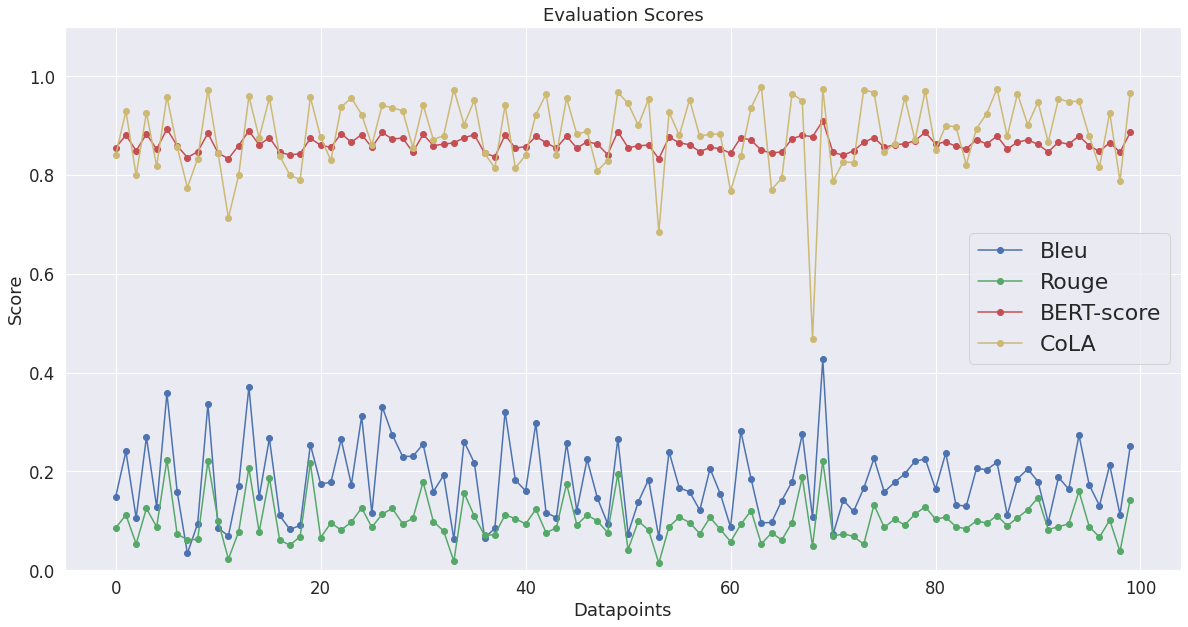

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision', 2)



sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (20,10)

plt.plot(results['bleu'], 'b-o', label="Bleu")
plt.plot(results['rouge'], 'g-o', label="Rouge")
plt.plot(results['bert_score'], 'r-o', label="BERT-score")
plt.plot(results['cola'], 'y-o', label="CoLA")
plt.ylim([0, 1.1])

plt.title("Evaluation Scores")
plt.xlabel("Datapoints")
plt.ylabel("Score")
plt.legend(fontsize=22)
#xt = [i for i in range(1,epochs+1)]
#plt.xticks(xt)

plt.show()

In [ ]:
results.loc[2]['generated_text']

'I am submitting my resume for the position of Accounts Payable. I am a Certified Account Manager, Certified Account Manager, and Account Manager for Westwood Ltd. I have experience in managing accounts, processing payments, and managing accounts with all levels of the banking industry. I am also a certified accountant and am in the process of getting my BSc in Accounting from Westwood Ltd.\nMy qualifications include:\n Excelling as a Certified Account Manager with J.B. & Sons, processing payments and accounts, and handling all aspects of accounts payable operations.\n Accurately and expeditiously managing all aspects of accounts payable functions, including verification, approval, payment processing, and reconciliation.\n Handling all aspects of accounts payable, including payment processing, verification, and reconciliation.\n Demonstrating excellent communication, time management, and leadership skills.\nWith a proven track record of providing outstanding account management, I am we

In [ ]:
import numpy as np

In [ ]:
np.mean(results['bleu']), np.mean(results['rouge']), np.mean(results['bert_score']), np.mean(results['cola'])

(0.18072150065010145,
 0.1004720809097289,
 0.8628884377238925,
 0.8837096914033024)

In [ ]:
results = pd.read_csv('/content/gdrive/MyDrive/gpt2/evaluation_stats_lr34_b4_e5.csv')

In [ ]:
total = []
for i in range(len(results)):
  total.append((results['bleu'][i] + results['rouge'][i] + results['bert_score'][i] + results['cola'][i])/4)

In [ ]:
for i in range(len(total)):
  if total[i] ==  0.43724361927367483:
    print(i)

1


In [ ]:
test_data['keywords'][np.argmin(total)]

'Upper, unable, limited, learning, helpful'

In [ ]:
total[np.argmin(total)]

0.3755915592001048

In [ ]:
results['generated_text'][np.argmin(total)]

'Human Resources Coordinator, Human Resources Assistant, Human Resources Coordinator\nHuman Resources Assistant, Human Resources Coordinator, Human Resources Coordinator\nHuman Resources Assistant, Human Resources Coordinator,  aware\nHuman Resources Coordinator,  aware\nHuman Resources Coordinator,  aware\nHuman Resources Coordinator,  aware\nHuman Resources Assistant,  aware\nHuman Resources Coordinator,  aware\nHuman Resources Coordinator,  aware\nHuman Resources Assistant,  aware\nHuman Resources Coordinator,  aware\nHuman Resources Coordinator,  aware\nHuman Resources Assistant,  aware\nHuman Resources Assistant,  aware\nHuman Resources Coordinator,  aware\nHuman Resources Coordinator,  aware\nHuman Resources Assistant,  aware\nHuman Resources Coordinator,  aware\nHuman Resources Coordinator,  aware\nHuman Resources Coordinator,  aware\nHuman Resources Coordinator,  aware\nHuman Resources Assistant,  aware\nHuman Resources Coordinator,  aware\nHuman Resources Assistant,  aware\nHu

In [ ]:
#version 1 _lr34_e5_b4 (0.19341186224835308, 0.09978362510806837, 0.8660475588542379, 0.8902509384799489)
#version 2 _lr44_b4_e7 (0.18821296890932504, 0.09961749716055557, 0.8631293255466516, 0.8845868692493535)
#version 3 _lr34_b4_e6 (0.18072150065010145, 0.1004720809097289, 0.8628884377238925, 0.8837096914033024)

In [ ]:
[round(i,3) for i in [0.18072150065010145, 0.1004720809097289, 0.8628884377238925, 0.8837096914033024]]

[0.181, 0.1, 0.863, 0.884]